#improts/setup/1

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


In [2]:
##
fred_api_key='757bd158e2644833e0816326fa62b6dd'
!pip install scikit-optimize
!pip install catboost
!pip install pandas-datareader quandl
#import pandas_datareader as pdr
#import quandl
!pip install fredapi
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.6 MB/s eta 0:00:00


In [3]:
#imports for models for now

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from skopt import BayesSearchCV
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import pandas as pd
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit
from skopt import BayesSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# BASE
# ------------------------------------------------------
import numpy as np
import pandas as pd
import os
import gc
import warnings

# PACF - ACF
# ------------------------------------------------------
import statsmodels.api as sm

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit
import yfinance as yf
import pandas as pd
from datetime import date
import pandas_datareader as pdr
from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [5]:

# BASE
# ------------------------------------------------------
import numpy as np
import pandas as pd
import os
import gc
import warnings

# PACF - ACF
# ------------------------------------------------------
import statsmodels.api as sm

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit
import yfinance as yf
import pandas as pd
from datetime import date
import pandas_datareader as pdr
from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit

In [6]:
import yfinance as yf
import pandas as pd
from datetime import date
import pandas_datareader as pdr
from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit


pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [7]:

from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit

In [8]:
#plot_predictions()


#VARIABLES/2

In [9]:
from fredapi import Fred

# CONFIGURATIONS
# ------------------------------------------------------
##
fred_api='757bd158e2644833e0816326fa62b6dd'

api_key = "MKPgJRfnF-StyhmP8--d"
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

##long lists


In [10]:
most_important_columns = [
    "Total Assets",
    "Total Equity Gross Minority Interest",
    "Total Liabilities Net Minority Interest",
    "Net Tangible Assets",
    "Stockholders Equity",
    "Total Debt",
    "Net Debt",
    "Working Capital",
    "Invested Capital",
    "Common Stock Equity",
    "Tangible Book Value",
    "Total Capitalization",
    "Treasury Shares Number",
    "Ordinary Shares Number",
    "Share Issued",
    "Capital Lease Obligations",
    "Minority Interest",
    "Retained Earnings",
    "Total Non Current Liabilities Net Minority Interest",
    "Long Term Debt",
    "Current Liabilities",
    "Current Debt",
    "Cash And Cash Equivalents",
    "Net Income",
    "Operating Income",
    "Gross Profit",
    "Operating Revenue",
    "Cost Of Revenue",
    "Net Income From Continuing Operations"
]
moderately_important_columns = [
    "Long Term Provisions",
    "Other Non Current Liabilities",
    "Other Current Liabilities",
    "Other Equity Adjustments",
    "Other Non Current Assets",
    "Other Current Assets",
    "Property, Plant, and Equipment (PPE)",
    "Intangible Assets",
    "Goodwill",
    "Research and Development Expenses",
    "Selling, General, and Administrative Expenses",
    "Interest Expense",
    "Interest Income",
    "Income Tax Expense",
    "Net Income Available to Common Stockholders",
    "Earnings per Share (EPS)",
    "Dividends",
    "Return on Equity (ROE)",
    "Return on Assets (ROA)",
    "Debt to Equity Ratio",
    "Current Ratio",
    "Quick Ratio",
    "Inventory Turnover",
    "Accounts Receivable Turnover",
    "Days Sales Outstanding (DSO)",
    "Fixed Asset Turnover",
    "Profit Margin",
    "Operating Margin",
    "Return on Investment (ROI)"
]
less_important_columns = [
    "Accumulated Depreciation",
    "Deferred Revenue",
    "Deferred Tax Assets",
    "Deferred Tax Liabilities",
    "Long-Term Investments",
    "Short-Term Investments",
    "Accounts Payable",
    "Accrued Expenses",
    "Other Income/Expenses",
    "Share Buybacks",
    "Net Cash Flow from Operations",
    "Net Cash Flow from Investing Activities",
    "Net Cash Flow from Financing Activities",
    "Free Cash Flow",
    "Capital Expenditures",
    "Earnings Before Interest, Taxes, Depreciation, and Amortization (EBITDA)",
    "Price-to-Earnings Ratio (P/E)",
    "Price-to-Book Ratio (P/B)",
    "Dividend Yield",
    "Market Capitalization",
    "Book Value per Share",
    "Economic Value Added (EVA)",
    "Market Share",
    "Brand Value",
    "Customer Satisfaction Index",
    "Employee Turnover Rate",
    "Working Capital Turnover",
    "Return on Investment Capital (ROIC)",
    "Gross Domestic Product (GDP)",
    "Consumer Price Index (CPI)",
    "Unemployment Rate",
    "Interest Rates",
    "Inflation Rate"
]
least_important_columns = [
    "Normalized Income",
    "Other Comprehensive Income",
    "Pension and Employee Benefit Expense",
    "Amortization of Intangible Assets",
    "Impairment Charges",
    "Restructuring Charges",
    "Litigation Expenses",
    "Foreign Exchange Gains/Losses",
    "Non-Operating Income/Expenses",
    "Stock-Based Compensation",
    "Goodwill Impairment",
    "Asset Write-Offs",
    "Tax Rate",
    "R&D as a Percentage of Revenue",
    "SG&A as a Percentage of Revenue",
    "Interest Coverage Ratio",
    "Inventory to Sales Ratio",
    "Fixed Charge Coverage Ratio",
    "Cash Conversion Cycle",
    "Net Promoter Score (NPS)",
    "Social Media Engagement",
    "Environmental, Social, and Governance (ESG) Metrics",
    "Corporate Social Responsibility (CSR) Initiatives",
    "Industry-Specific Key Performance Indicators (KPIs)",
    "Regulatory Compliance",
    "Technology Adoption",
    "Customer Acquisition Cost (CAC)",
    "Lifetime Value (LTV) of a Customer",
    "Net Promoter Score (NPS)",
    "Churn Rate"
]


In [11]:
ticker_names_technology = ["IBM", "AAPL", "GOOGL", "MSFT", "AMZN", "INTC", "CSCO", "NVDA", "ORCL"]
ticker_names_finance = ["JPM", "BAC", "GS", "C", "WFC", "AXP", "MS", "BLK", "SPGI", "PNC"]
ticker_names_healthcare = ["JNJ", "PFE", "UNH", "MRK", "ABT", "TMO", "CVS", "MDT", "LLY", "AMGN"]
ticker_names_energy = ["XOM", "CVX", "BP", "COP", "SLB", "EQT", "PXD", "EOG"]
ticker_names_retail = ["WMT", "TGT", "COST", "HD", "MCD", "NKE", "ULTA", "LOW", "BBY", "CVS"]
ticker_names_automotive = ["TM", "F", "GM", "HMC", "VLKAF", "TSLA", "BMWYY", "DDAIF", "HYMTF", "RACE"]
ticker_names_telecommunications = ["T", "VZ", "TMUS", "CHL", "ORAN", "AMX", "DTEGF", "BTI", "TU", "VOD"]
ticker_names_pharmaceuticals = ["GSK", "SNY", "NVS", "AZN", "LLY", "BMY", "ABBV", "GILD", "MRNA", "PFE"]
ticker_names_airlines = ["AAL", "DAL", "UAL", "LUV", "BA", "EADSY", "RYAAY", "AFRAF", "LHA", "JBLU"]
ticker_names_entertainment = ["DIS", "NFLX", "CMCSA", "TME", "SNE", "LGF.A", "VIAC", "ROKU", "AMC", "MSGN"]
ticker_names_pharma_distribution = ["ABC", "MCK", "CAH", "HSIC", "PBH", "OMI", "PDCO", "HSY", "OXM", "RGR"]
ticker_names_aviation = ["BA", "LUV", "DAL", "UAL", "EADSY", "RYAAY", "AFRAF", "LHA", "JBLU", "AC"]
ticker_names_construction = ["ACM", "FLR", "JEC", "KBR", "MTRN", "PWR", "J", "GVA", "FWLT", "DY"]
ticker_names_food_and_beverage = ["KO", "PEP", "MNST", "KHC", "GIS", "CPB", "STZ", "WBA", "HRL", "CAG"]
ticker_names_gaming = ["ATVI", "EA", "TTWO", "UBSFY", "NTDOY", "NCBDF", "SE", "CDPR", "NVDA", "AMD"]
ticker_names_renewable_energy = ["NEE", "DQ", "ENPH", "SEDG", "FSLR", "PLUG", "BE", "RUN", "SPWR", "REGI"]
ticker_names_telecom_equipment = ["ERIC", "NOK", "ZTCOF", "ADBE", "CRM", "INTU", "NOW", "UBER", "LYFT", "TEAM"]
ticker_names_cosmetics = ["EL", "COTY", "NUS", "IPAR", "REV", "CURLF", "ESTC", "LZB", "ULTA", "SYY"]
ticker_names_logistics = ["UPS", "FDX", "CHRW", "EXPD", "SNDR", "CTVA", "XPO", "LSTR", "JBHT", "HTLD"]
ticker_names_real_estate = ["SPG", "PSA", "PLD", "EQIX", "CBRE", "BXP", "AMT", "ARE", "WELL", "AVB"]

#ticker_names_hist = ["AAPL", "MSFT"]
#ticker_names_hist = ["AAPL", "MSFT", "VGT", "VHT", "VFH", "VDE", "VCR", "VDC", "VIS", "VAW", "VPU", "VNQ","GOOGL", "AMZN"]
#currencies = ['USD=EUR', 'USD=GBP', 'USD=JPY', 'USD=AUD', 'USD=CAD']
#ticker_names_hist = ["AAPL", "MSFT", "VGT", "VHT", "VFH", "VDE", "VCR", "VDC", "VIS", "VAW", "VPU", "VNQ", "GOOGL", "AMZN", "JPM", "GS", "BRK-B", "SPY", "QQQ", "DIA", "XLF", "XLV", "XLE", "XLK", "XLY", "XLI", "XLB", "XLRE", "XLP"]
#ticker_names_hist = ["AAPL", "MSFT", "VGT", "VHT", "VFH", "VDE", "VCR", "VDC", "VIS", "VAW", "VPU", "VNQ", "GOOGL", "AMZN", "JPM", "GS", "BRK-B", "SPY", "QQQ", "DIA", "XLF", "XLV", "XLE", "XLK", "XLY", "XLI", "XLB", "XLRE", "XLP"]
#ticker_names_fin = []
#quandl_codes = [ "ODA/PALUM_USD", "ODA/PCOPP_USD","ODA/PGNUTS_USD", "ODA/PCOTTIND_USD"]
#quandl_codes = [ ]

In [12]:
ticker_names_technology = ["IBM", "AAPL", "GOOGL", "MSFT", "AMZN", "INTC", "CSCO", "NVDA", "ORCL", "ADBE", "CRM", "TXN", "QCOM", "SAP", "VMW", "ACN", "HPQ", "ADI", "AMAT", "NOW", "CTSH", "WIT", "INFY", "LRCX", "DELL", "SNPS", "MU", "ATVI", "APH"]
ticker_names_finance = ["JPM", "BAC", "GS", "C", "WFC", "AXP", "MS", "BLK", "SPGI", "PNC", "BK", "USB", "MET", "COF", "AIG", "TRV", "SCHW", "PRU", "PGR", "DFS", "AON", "MMC", "MCO", "CME", "ICE", "NTRS", "NDAQ", "CB", "CBOE", "KEY", "FITB"]
ticker_names_healthcare = ["JNJ", "PFE", "UNH", "MRK", "ABT", "TMO", "CVS", "MDT", "LLY", "AMGN", "CI", "SYK", "BDX", "GILD", "ISRG", "DHR", "VRTX", "REGN", "ZTS", "BMY", "HCA", "ANTM", "ILMN", "EW", "VRTX", "BSX", "IDXX", "ALXN", "IQV", "HOLX"]
ticker_names_energy = ["XOM", "CVX", "RDS.A", "TOT", "BP", "COP", "SLB", "EQT", "PXD", "EOG", "OXY", "VLO", "KMI", "PSX", "APC", "APA", "HES", "MPC", "NOV", "DVN", "FTI", "COG", "WMB", "HAL", "CXO", "MRO", "PAA", "CHK", "EOG", "EPD", "ET"]
ticker_names_retail = ["WMT", "TGT", "COST", "HD", "MCD", "NKE", "ULTA", "LOW", "BBY", "CVS", "TJX", "DG", "KR", "ROST", "DLTR", "SBUX", "TSCO", "AZO", "GPC", "TIF", "TJX", "COST", "DLTR", "FL", "TGT", "BBY", "LOW", "KSS", "M", "JWN"]
ticker_names_automotive = ["TM", "F", "GM", "HMC", "VLKAF", "TSLA", "BMWYY", "DDAIF", "HYMTF", "RACE", "POAHF", "DMLRY", "FUJHY", "DDAIY", "NSANY", "RNSDF", "GELYF", "TSLA", "VWAGY", "BAMXF", "HYMTF", "TSLA", "HMC", "NSANY", "VLKAF", "RACE", "GM", "F", "FCAU"]
ticker_names_telecommunications = ["T", "VZ", "TMUS", "CHL", "ORAN", "AMX", "DTEGF", "BTI", "TU", "VOD", "S", "CCI", "AMT", "SBAC", "TMUS", "VZ", "CBB", "DLNK", "TMUS", "IDCC", "ELNK", "GLIBA", "DTEGF", "CNSL", "VG", "DTEGY", "ORAN", "SKM", "LBTYA", "IWSY"]
ticker_names_pharmaceuticals = ["GSK", "SNY", "NVS", "AZN", "LLY", "BMY", "ABBV", "GILD", "MRNA", "PFE", "AMGN", "CELG", "REGN", "VRTX", "NVO", "ZTS", "ALXN", "BIIB", "INCY", "ILMN", "ALNY", "MRK", "JNJ", "RHHBY", "AMGN", "GSK", "ABT", "BMY", "SNY", "ABBV"]
ticker_names_airlines = ["AAL", "DAL", "UAL", "LUV", "BA", "EADSY", "RYAAY", "AFRAF", "LHA", "JBLU", "ALK", "UAL", "SKYW", "CEA", "CPA", "LUV", "RYAAY", "SAVE", "LHA", "EZJ", "AAL", "DLAKF", "AER", "AAL", "VLRS", "DAL", "RJETQ", "RYAAY", "CEA", "JBLU"]
ticker_names_entertainment = ["DIS", "NFLX", "CMCSA", "TME", "SNE", "LGF.A", "VIAC", "ROKU", "AMC", "MSGN", "SPOT", "NWSA", "DISCA", "DISCK", "LIVE", "CNK", "MSGN", "IMAX", "LYV", "NFLX", "LGF.B", "SNE", "VIA", "ROKU", "AMCX", "FWONK", "ISCA", "LBTYA", "MSGN", "VIAB"]
ticker_names_pharma_distribution = ["ABC", "MCK", "CAH", "HSIC", "PBH", "OMI", "PDCO", "HSY", "OXM", "RGR", "CHD", "CAG", "CPB", "HRL", "SJM", "MKC", "GIS", "KHC", "WMT", "K", "TSN", "PEP", "KO", "CCEP", "FIZZ", "BF.B", "STZ", "DPS", "MO", "PM"]
ticker_names_aviation = ["BA", "LUV", "DAL", "UAL", "EADSY", "RYAAY", "AFRAF", "LHA", "JBLU", "AC", "ALK", "CEA", "CATH", "CPA", "EZJ", "AAL", "RYAAY", "DLAKF", "RJETQ", "VLRS"]
ticker_names_construction = ["ACM", "FLR", "JEC", "KBR", "MTRN", "PWR", "J", "GVA", "FWLT", "DY", "TTEK", "JBT", "KBR", "CBI", "DOW", "AEGN", "LII", "MDR", "KMT", "DHI"]
ticker_names_food_and_beverage = ["KO", "PEP", "MNST", "KHC", "GIS", "CPB", "STZ", "WBA", "HRL", "CAG", "MDLZ", "ADM", "TSN", "HAIN", "K", "KDP", "KMB", "HAIN", "RAI", "HSY"]
ticker_names_gaming = ["ATVI", "EA", "TTWO", "UBSFY", "NTDOY", "NCBDF", "SE", "CDPR", "NVDA", "AMD", "ZNGA", "SNY", "CTRP", "SNE", "TCEHY", "ASML", "NCBDF", "NEXOF", "SQNXF", "SGAMY"]
ticker_names_renewable_energy = ["NEE", "DQ", "ENPH", "SEDG", "FSLR", "PLUG", "BE", "RUN", "SPWR", "REGI", "GE", "BEP", "VWSYF", "DNNGY", "XEL", "TERP", "ORA", "EDF", "BEP", "ENB"]
ticker_names_telecom_equipment = ["ERIC", "NOK", "ZTCOF", "ADBE", "CRM", "INTU", "NOW", "UBER", "LYFT", "TEAM", "CTSH", "INFY", "WIT", "DXC", "HPE", "SSNC", "DOX", "EPAM", "PAYC", "AKAM"]
ticker_names_cosmetics = ["EL", "COTY", "NUS", "IPAR", "REV", "CURLF", "ESTC", "LZB", "ULTA", "SYY", "ELF", "COST", "CLX", "TUP", "COTY", "PG", "CHD", "CL", "VFC", "NWL"]
ticker_names_logistics = ["UPS", "FDX", "CHRW", "EXPD", "SNDR", "CTVA", "XPO", "LSTR", "JBHT", "HTLD", "ODFL", "R", "KSU", "GWR", "EXR", "PLD", "WY", "ARE", "PSA", "OHI"]
ticker_names_real_estate = ["SPG", "PSA", "PLD", "EQIX", "CBRE", "BXP", "AMT", "ARE", "WELL", "AVB", "CCI", "DRE", "ESS", "HCFT", "IRM", "AMT", "CONE", "DLR", "MAC", "O"]


In [13]:

fred_indicators = [
    "CPIAUCSL",  # Consumer Price Index (CPI)
    "UNRATE",  # Unemployment Rate
    "PPIACO",  # Producer Price Index (PPI)
    "PI",  # Personal Income
    "PCE",  # Personal Consumption Expenditures (PCE)
    "RSXFS",  # Retail Sales
    "INDPRO",  # Industrial Production
    "HOUST",  # Housing Starts
    "UMCSENT",  # Consumer Sentiment Index
    "DGS10",  # 10-Year Treasury Constant Maturity Rate
    "FEDFUNDS",  # Effective Federal Funds Rate
    #"GDP",  # Gross Domestic Product
    "DGS1",  # 1-Year Treasury Constant Maturity Rate
    "AAA",  # Moody's Seasoned Aaa Corporate Bond Yield
    "CPILFESL",  # Consumer Price Index for All Urban Consumers: All Items Less Food and Energy
    "PAYEMS",  # All Employees, Total Nonfarm
    "M2",  # M2 Money Stock
    "T10Y2Y",  # 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
    "BAA",  # Moody's Seasoned Baa Corporate Bond Yield
    #"GFDEGDQ188S",  # Federal Debt: Total Public Debt as Percent of Gross Domestic Product
    #"A191RL1Q225SBEA",  # Real Gross Domestic Product (Percent Change from Preceding Period)
    "GS10",  # 10-Year Treasury Constant Maturity Rate
    "GS1",  # 1-Year Treasury Constant Maturity Rate
    "BAMLH0A0HYM2",  # US Corporate BBB Effective Yield
    #"USROA",  # Return on Average Assets for all U.S. Banks
    #"USROE",  # Return on Average Equity for all U.S. Banks
    "BUSLOANS",  # Commercial and Industrial Loans, All Commercial Banks
    "ISRATIO",  # Inventory-to-Sales Ratio, Manufacturing and Trade
    "ICSA",  # Initial Claims
    "CCSA"  # Continued Claims (Insured Unemployment)
]

annual_indicators = [
    "GDP",  # Gross Domestic Product
    "A191RL1Q225SBEA"  # Real Gross Domestic Product (Percent Change from Preceding Period)
]


quandl_codes = [ ]


In [14]:
all_ticker_names = ticker_names_technology + ticker_names_finance + ticker_names_healthcare + ticker_names_energy + ticker_names_retail + ticker_names_automotive + ticker_names_telecommunications + ticker_names_pharmaceuticals + ticker_names_airlines + ticker_names_entertainment + ticker_names_pharma_distribution + ticker_names_aviation + ticker_names_construction + ticker_names_food_and_beverage + ticker_names_gaming + ticker_names_renewable_energy + ticker_names_telecom_equipment + ticker_names_cosmetics + ticker_names_logistics + ticker_names_real_estate

ticker_names_hist = ["AAPL", "MSFT", "VGT", "VHT", "VFH", "VDE", "VCR", "VDC", "VIS", "VAW", "VPU", "VNQ","GOOGL", "AMZN"]

In [15]:
start_date = "2018-1-01"
end_date = "2022-01-01"
frequency = "1d"


#functions/3

In [45]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def get_first_non_nan_sorted(dataset):
    total_rows = len(dataset)

    # Initialize a list to store the first non-NaN values and their indices
    first_non_nan_values = []

    for column in dataset.columns:
        # Get the column values excluding NaNs
        column_values = dataset[column].values
        non_nan_indices = np.where(~np.isnan(column_values))[0]

        # Check if there are any non-NaN values
        if len(non_nan_indices) > 0:
            # Retrieve the first non-NaN value and its index
            first_non_nan_value = column_values[non_nan_indices[0]]
            index_type = type(dataset.index[0])
            first_non_nan_index = index_type(dataset.index[non_nan_indices[0]])

            # Add the first non-NaN value and its index to the list
            first_non_nan_values.append((column, first_non_nan_index, first_non_nan_value))

    # Sort the first non-NaN values based on the sorted indices
    sorted_first_non_nan_values = sorted(first_non_nan_values, key=lambda x: x[1])

    return sorted_first_non_nan_values



def plot_columns(dataframe, n=7, figsize=(20, 16)):
    # Apply min-max scaling to the selected columns
    scaler = MinMaxScaler()
    scaled_columns = pd.DataFrame(scaler.fit_transform(dataframe),
                                  columns=dataframe.columns,
                                  index=dataframe.index)

    # Number of graphs
    num_graphs = len(dataframe.columns) // n if len(dataframe.columns) % n == 0 else len(dataframe.columns) // n + 1


    for k in range(num_graphs):
        start = k * n
        end = (k + 1) * n if (k + 1) * n < len(dataframe.columns) else len(dataframe.columns)

        fig, ax = plt.subplots(figsize=figsize)

        # Plot each column as a line
        for column in dataframe.columns[start:end]:
            ax.plot(scaled_columns.index, scaled_columns[column], label=column)

        # Set the x-axis label
        ax.set_xlabel('Index')

        # Set the y-axis label
        ax.set_ylabel('Scaled Value')

        # Set the title
        ax.set_title(f'Columns Plot {k+1}')

        # Add a legend
        ax.legend()

        # Display the plot
        plt.show()

def print_nan_zero_percentage(dataset):
    total_rows = len(dataset)

    # Calculate percentage of NaN and 0 values for each column
    nan_zero_percentage = []
    for column in dataset.columns:
        nan_percentage = dataset[column].isna().sum() / total_rows * 100
        zero_percentage = (dataset[column] == 0).sum() / total_rows * 100

        nan_zero_percentage.append((column, nan_percentage, zero_percentage))

    # Sort the percentages in descending order based on NaN percentage
    sorted_nan_zero_percentage = sorted(nan_zero_percentage, key=lambda x: x[1], reverse=True)

    # Print the sorted percentages
    for column, nan_percentage, zero_percentage in sorted_nan_zero_percentage:
        print(f"Column: {column}")
        print(f"NaN Percentage: {nan_percentage:.2f}%")
        print(f"Zero Percentage: {zero_percentage:.2f}%")
        print("------------------------")

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

def plot_yearly(df, start, end, start_date, end_date):
    # Plot each column
    for column in df.columns[start:end+1]:
        # Create a new figure for this column
        fig, ax = plt.subplots(figsize=(12, 6))

        # For each year
        for year in range(pd.to_datetime(start_date).year, pd.to_datetime(end_date).year):
            # Get data for this year
            start_of_year = max(pd.to_datetime(f"{year}-01-01"), pd.to_datetime(start_date))
            end_of_year = min(pd.to_datetime(f"{year+1}-01-01") - pd.Timedelta(days=1), pd.to_datetime(end_date))
            yearly_data = df[(df.index >= start_of_year) & (df.index <= end_of_year)][column]

            # Apply min-max scaling to the selected columns
            scaler = MinMaxScaler()
            yearly_data = pd.Series(scaler.fit_transform(yearly_data.values.reshape(-1, 1)).flatten(),
                                    index=yearly_data.index)

            # Create a continuous date index and interpolate missing data
            all_days = pd.date_range(start=start_of_year, end=end_of_year, freq='D')
            yearly_data = yearly_data.reindex(all_days).interpolate(method='time')

            # Plot data
            ax.plot(yearly_data.index.dayofyear, yearly_data.values, label=year)

        # Set labels and title
        ax.set_xlabel('Day of Year')
        ax.set_ylabel('Scaled Value')
        ax.set_title(f'{column} - Yearly Comparison')

        # Simplify x-axis to 12 ticks
        ax.set_xticks(np.linspace(1, 365, num=12))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

        # Show legend
        ax.legend()

        # Show the plot
        plt.show()

import matplotlib.patches as mpatches

def visualize_data(df, figsize=(15, 10)):
    n = 10  # Number of columns per plot
    num_plots = np.ceil(df.shape[1] / n).astype(int)  # Calculate the number of plots needed

    for i in range(num_plots):
        fig, ax = plt.subplots(figsize=figsize)  # Set the figure size

        # Select the columns for this plot
        columns = df.columns[i * n: (i + 1) * n]

        for col_num, col_name in enumerate(columns):
            col_data = df[col_name]

            # Iterate over rows and stack them in the bar plot
            for row_num, value in enumerate(col_data):
                if pd.isna(value):
                    color = 'red'
                elif value == 0:
                    color = 'blue'
                else:
                    color = 'green'
                ax.bar(col_num, 1, bottom=row_num, color=color)

        # Set Y-axis labels as row indices for selected rows only
        selected_ticks = range(0, len(df.index), len(df.index)//10)  # Select every 10% of data for labeling
        ax.set_yticks(selected_ticks)
        ax.set_yticklabels(df.index[selected_ticks])

        # Set X-axis labels as column names
        ax.set_xticks(range(len(columns)))
        ax.set_xticklabels(columns)

        # Create legend
        red_patch = mpatches.Patch(color='red', label='NaN')
        blue_patch = mpatches.Patch(color='blue', label='Zero')
        green_patch = mpatches.Patch(color='green', label='Non-Zero')
        ax.legend(handles=[red_patch, blue_patch, green_patch])

        plt.show()


In [17]:
import matplotlib.patches as mpatches

def visualize_data(df, figsize=(15, 10)):
    n = 10  # Number of columns per plot
    num_plots = np.ceil(df.shape[1] / n).astype(int)  # Calculate the number of plots needed

    for i in range(num_plots):
        fig, ax = plt.subplots(figsize=figsize)  # Set the figure size

        # Select the columns for this plot
        columns = df.columns[i * n: (i + 1) * n]

        for col_num, col_name in enumerate(columns):
            col_data = df[col_name]

            # Iterate over rows and stack them in the bar plot
            for row_num, value in enumerate(col_data):
                if pd.isna(value):
                    color = 'red'
                elif value == 0:
                    color = 'blue'
                else:
                    color = 'green'
                ax.bar(col_num, 1, bottom=row_num, color=color)

        # Set Y-axis labels as row indices for selected rows only
        selected_ticks = range(0, len(df.index), len(df.index)//10)  # Select every 10% of data for labeling
        ax.set_yticks(selected_ticks)
        ax.set_yticklabels(df.index[selected_ticks])

        # Set X-axis labels as column names
        ax.set_xticks(range(len(columns)))
        ax.set_xticklabels(columns)

        # Create legend
        red_patch = mpatches.Patch(color='red', label='NaN')
        blue_patch = mpatches.Patch(color='blue', label='Zero')
        green_patch = mpatches.Patch(color='green', label='Non-Zero')
        ax.legend(handles=[red_patch, blue_patch, green_patch])

        plt.show()



In [18]:
def categorize_data(df, data_ranges):
    dfRated = df.copy()
    for col in df.columns[2:]:  # Exclude 'index' and 'Ticker' columns
        for key, value in data_ranges.items():
            mask = (df[col] > value[0][0]) & (df[col] <= value[0][1])
            dfRated.loc[mask, col] = key
    return dfRated


data_ranges = {
    'Best': [(10, float('inf')) for _ in range(16)],
    'Above_Average': [(7.5, 10) for _ in range(16)],
    'Average': [(5, 7.5) for _ in range(16)],
    'Below_Average': [(2.5, 5) for _ in range(16)],
    'Worst': [(float('-inf'), 2.5) for _ in range(16)]
}


##optuna with trials set


In [19]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00


In [20]:

from sklearn.model_selection import cross_val_score

In [21]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from optuna import create_study

class ModelSelectionPipeline:
    def __init__(self, model, model_params, n_trials=10):
        self.model = model
        self.model_params = model_params
        self.n_trials = n_trials
        self.best_model = None
        self.best_predictions = None

    def objective(self, trial, X, y):
        params = self.model.get_params()  # Start with the model's default parameters
        for param, bounds in self.model_params.items():
            if isinstance(bounds[0], int):
                params[param] = trial.suggest_int(param, min(bounds), max(bounds))
            elif isinstance(bounds[0], float):
                params[param] = trial.suggest_float(param, min(bounds), max(bounds))
            else:
                params[param] = trial.suggest_categorical(param, bounds)
        self.model.set_params(**params)

        pipeline = Pipeline(steps=[("StandardScaler", StandardScaler()),
                                   ("RFE", RFE(self.model)),
                                   ("Model", self.model)])
        tscv = TimeSeriesSplit(n_splits=12)  # TimeSeries cross-validator
        scores = cross_val_score(pipeline, X, y, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error')
        return -scores.mean()  # we return the negative mean squared error

    def fit_and_predict(self, X_train, y_train, X_test):
        study = create_study(direction='minimize')
        objective_fn = lambda trial: self.objective(trial, X_train, y_train)
        study.optimize(objective_fn, n_trials=self.n_trials)
        self.best_model = study.best_params
        self.best_predictions = self.model.predict(X_test)


##plots+lag



In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction(y_test,prdictions):
    # Print out the results
    plt.figure(figsize=(20, 10))

    try:
        print(f"regressor MSE: {rf_mse:.2f}, RMSE: {np.sqrt(rf_mse):.2f}, MAE: {mean_absolute_error(y_test, prdictions):.2f}, R2 Score: {r2_score(y_test, prdictions):.2f}")
        plt.plot(y_test.index, prdictions, color='green', label='regressor')
    except NameError:
        pass


    plt.scatter(y_test.index, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test

    plt.xlabel("Actual")  # Set the x-axis label
    plt.ylabel("Predicted")  # Set the y-axis label
    plt.legend()  # Show a legend with the labels for each plot
    plt.title("Predictions vs Actual")  # Set the plot title
    plt.show()  # Display the plot


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions():
    # Print out the results
    plt.figure(figsize=(20, 10))

    try:
        print(f"RandomForestRegressor MSE: {rf_mse:.2f}, RMSE: {np.sqrt(rf_mse):.2f}, MAE: {mean_absolute_error(y_test, rf_predictions):.2f}, R2 Score: {r2_score(y_test, rf_predictions):.2f}, Best params: {rf.best_params_}")
        plt.plot(y_test.index, rf_predictions, color='green', label='RandomForestRegressor')
    except NameError:
        pass
    try:
        print(f"SGDRegressor MSE: {sgd_mse:.2f}, RMSE: {np.sqrt(sgd_mse):.2f}, MAE: {mean_absolute_error(y_test, sgd_predictions):.2f}, R2 Score: {r2_score(y_test, sgd_predictions):.2f}")
        plt.plot(y_test.index, sgd_predictions, color='green', label='SGDRegressor')
    except NameError:
        pass

    try:
        print(f"Ridge MSE: {ridge_mse:.2f}, RMSE: {np.sqrt(ridge_mse):.2f}, MAE: {mean_absolute_error(y_test, ridge_predictions):.2f}, R2 Score: {r2_score(y_test, ridge_predictions):.2f}, Best params: {ridge.best_params_}")
        plt.plot(y_test.index, ridge_predictions, color='blue', label='Ridge')
    except NameError:
        pass
    try:
        print(f"Lasso MSE: {lasso_mse:.2f}, RMSE: {np.sqrt(lasso_mse):.2f}, MAE: {mean_absolute_error(y_test, lasso_predictions):.2f}, R2 Score: {r2_score(y_test, lasso_predictions):.2f}, Best params: {lasso.best_params_}")
        plt.plot(y_test.index, lasso_predictions, color='red', label='Lasso')
    except NameError:
        pass

    try:
        print(f"Ridge MSE: {ridge_mse:.2f}, RMSE: {np.sqrt(ridge_mse):.2f}, MAE: {mean_absolute_error(y_test, ridge_predictions):.2f}, R2 Score: {r2_score(y_test, ridge_predictions):.2f}, Best params: {ridge.best_params_}")
        plt.plot(y_test.index, ridge_predictions, color='blue', label='Ridge')
    except NameError:
        pass

    try:
        print(f"GradientBoostingRegressor MSE: {gbr_mse:.2f}, RMSE: {np.sqrt(gbr_mse):.2f}, MAE: {mean_absolute_error(y_test, gbr_predictions):.2f}, R2 Score: {r2_score(y_test, gbr_predictions):.2f}, Best params: {gbr.best_params_}")
        plt.plot(y_test.index, gbr_predictions, color='orange', label='GradientBoostingRegressor')
    except NameError:
        pass

    try:
        print(f"AdaBoostRegressor MSE: {ada_mse:.2f}, RMSE: {np.sqrt(ada_mse):.2f}, MAE: {mean_absolute_error(y_test, ada_predictions):.2f}, R2 Score: {r2_score(y_test, ada_predictions):.2f}, Best params: {ada.best_params_}")
        plt.plot(y_test.index, ada_predictions, color='purple', label='AdaBoostRegressor')
    except NameError:
        pass

    try:
        print(f"XGBoost MSE: {xgboost_mse:.2f}, RMSE: {np.sqrt(xgboost_mse):.2f}, MAE: {mean_absolute_error(y_test, xgboost_predictions):.2f}, R2 Score: {r2_score(y_test, xgboost_predictions):.2f}, Best params: {xgboost.best_params_}")
        plt.plot(y_test.index, xgboost_predictions, color='cyan', label='XGBoost')
    except NameError:
        pass

    try:
        print(f"StackingRegressor MSE: {stacking_mse:.2f}, RMSE: {np.sqrt(stacking_mse):.2f}, MAE: {mean_absolute_error(y_test, stacking_predictions):.2f}, R2 Score: {r2_score(y_test, stacking_predictions):.2f}")
        plt.plot(y_test.index, stacking_predictions, color='brown', label='StackingRegressor')
    except NameError:
        pass
    try:
        print(f"ElasticNet MSE: {elastic_mse:.2f}, RMSE: {np.sqrt(elastic_mse):.2f}, MAE: {mean_absolute_error(y_test, elastic_predictions):.2f}, R2 Score: {r2_score(y_test, elastic_predictions):.2f}, Best params: {elastic.best_params_}")
        plt.plot(y_test.index, elastic_predictions, color='pink', label='ElasticNet')
    except NameError:
        pass

    try:
        print(f"SVR MSE: {svr_mse:.2f}, RMSE: {np.sqrt(svr_mse):.2f}, MAE: {mean_absolute_error(y_test, svr_predictions):.2f}, R2 Score: {r2_score(y_test, svr_predictions):.2f}, Best params: {svr.best_params_}")
        plt.plot(y_test.index, svr_predictions, color='teal', label='SVR')
    except NameError:
        pass

    try:
        print(f"PLSRegression MSE: {pls_mse:.2f}, RMSE: {np.sqrt(pls_mse):.2f}, MAE: {mean_absolute_error(y_test, pls_predictions):.2f}, R2 Score: {r2_score(y_test, pls_predictions):.2f}, Best params: {pls.best_params_}")
        plt.plot(y_test.index, pls_predictions, color='violet', label='PLSRegression')
    except NameError:
        pass

    try:
        print(f"MLPRegressor MSE: {mlp_mse:.2f}, RMSE: {np.sqrt(mlp_mse):.2f}, MAE: {mean_absolute_error(y_test, mlp_predictions):.2f}, R2 Score: {r2_score(y_test, mlp_predictions):.2f}, Best params: {mlp.best_params_}")
        plt.plot(y_test.index, mlp_predictions, color='indigo', label='MLPRegressor')
    except NameError:
        pass

    plt.scatter(y_test.index, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test

    plt.xlabel("Actual")  # Set the x-axis label
    plt.ylabel("Predicted")  # Set the y-axis label
    plt.legend()  # Show a legend with the labels for each plot
    plt.title("Predictions vs Actual for all models")  # Set the plot title
    plt.show()  # Display the plot

# Call the function without any arguments
#plot_predictions()

# Call the function without any arguments
#plot_predictions()

In [24]:
def future(df, column_num=3, num_days=1):
    # copy the dataframe
    df_copy = df.copy()
    # shift the specified column 'days' into the future
    shifted_series = df_copy.iloc[:, column_num].shift(-num_days)
    # drop the last 'num_days' rows, which will be NaN
    shifted_series = shifted_series[:-num_days]
    # remove the last 'num_days' rows from the copied dataframe
    df_copy = df_copy[:-num_days]
    # insert the shifted series as the first column in the copied dataframe
    df_copy.insert(0, df_copy.columns[column_num] + f'_in_{num_days}_days', shifted_series)
    return df_copy




##data fetching

### fred

In [25]:
import pandas as pd
import numpy as np
from fredapi import Fred

def get_fred_data(fred_api_key, fred_indicators,freq='M'):
    # Fetch FRED data
    fred = Fred(api_key=fred_api_key)
    fred_dfs = []
    for indicator in fred_indicators:
        df = fred.get_series(indicator)
        df.name = f"FRED_{indicator}"
        fred_dfs.append(df.resample(freq).last())  # Resample to monthly frequency

    # Merge FRED data
    combined_data = pd.DataFrame(index=fred_dfs[0].index)
    for df in fred_dfs:
        combined_data = pd.merge(combined_data, df, how='outer', left_index=True, right_index=True)

    return combined_data

def resample_dataframe(df):
    last_date = df.index.max()
    end_of_month = last_date + pd.offsets.MonthEnd(1)
    new_date_range = pd.date_range(df.index.min(), end_of_month)
    df_daily = df.reindex(new_date_range).ffill()
    return df_daily




###yfinance/daily

In [26]:
import pandas as pd
import numpy as np
import yfinance as yf
import quandl

def name_col(df, string):
    new_columns = [string + column for column in df.columns]
    df.columns = new_columns
    return df

def get_combined_financial_data(api_key, ticker_names_hist, ticker_names_fin, quandl_codes, start_date, end_date, frequency='1d'):
    # Get historical data
    hist_dfs = []
    for ticker_name in ticker_names_hist:
        try:
            ticker = yf.Ticker(ticker_name)
            hist_data = ticker.history(start=start_date, end=end_date, interval=frequency)
            hist_data.columns = [f"{ticker_name}/{col}" for col in hist_data.columns]
            hist_data.index = hist_data.index.tz_localize(None)  # Remove timezone information
            hist_data = name_col(hist_data, "Stock_")
            hist_data[f"Stock_{ticker_name}/Price Fluctuations"] = 100 * ((hist_data[f"Stock_{ticker_name}/Close"] - hist_data[f"Stock_{ticker_name}/Open"]) / hist_data[f"Stock_{ticker_name}/Open"])
            hist_dfs.append(hist_data)
        except:
            print(f"Error retrieving historical data for ticker '{ticker_name}'")
            continue
    # Get financial statements
    financial_dfs = []
    for ticker_name in ticker_names_fin:
        ticker = yf.Ticker(ticker_name)
        financial_statement_dataframes = []
        for statement in [ticker.financials, ticker.cashflow, ticker.balance_sheet]:
            statement = statement.replace(0, np.nan)
            statement.fillna(statement.mean(), inplace=True)
            statement = statement.T  # Transpose to make dates as index
            statement.index = statement.index.to_period('Q').to_timestamp('Q')  # Convert to quarterly dates
            financial_statement_dataframes.append(statement)

        financial_statements = pd.concat(financial_statement_dataframes, axis=1)
        financial_statements = financial_statements.resample(frequency).interpolate().fillna(method='bfill')
        financial_statements = name_col(financial_statements, "FNCE_" + ticker_name + "/")
        financial_dfs.append(financial_statements)

    # Get Quandl data
    quandl_dfs = []
    for code in quandl_codes:
        df = quandl.get(code, start_date=start_date, end_date=end_date, api_key=api_key)
        df.columns = [f"Q_{code}_{col}" for col in df.columns]
        df.index = df.index.tz_localize(None)  # Remove timezone information
        df = df.loc[start_date:end_date]
        quandl_dfs.append(df)

    # Combine all dataframes in order: historical, financial, Quandl
    combined_df = pd.concat(hist_dfs + financial_dfs + quandl_dfs, axis=1)
    combined_df["DayOfWeek"] = combined_df.index.dayofweek
    combined_df["Month"] = combined_df.index.month
    combined_df["Year"] = combined_df.index.year

    # Resample and fill missing values
    combined_df = combined_df.resample(frequency).interpolate().fillna(method='bfill')
    combined_df = combined_df.loc[start_date:end_date]

    return combined_df







In [27]:
def get_cleaned_historical_data(ticker_names_hist, start_date, end_date, frequency='1d'):
    hist_dfs = []
    for ticker_name in ticker_names_hist:
        try:
            ticker = yf.Ticker(ticker_name)
            hist_data = ticker.history(start=start_date, end=end_date, interval=frequency)
            hist_data.columns = [f"{ticker_name}/{col}" for col in hist_data.columns]
            hist_data.index = hist_data.index.tz_localize(None)  # Remove timezone information
            hist_data = name_col(hist_data, "Stock_")
            hist_data[f"Stock_{ticker_name}/Price Fluctuations"] = 100 * ((hist_data[f"Stock_{ticker_name}/Close"] - hist_data[f"Stock_{ticker_name}/Open"]) / hist_data[f"Stock_{ticker_name}/Open"])
            hist_dfs.append(hist_data)
        except:
            print(f"Error retrieving historical data for ticker '{ticker_name}'")
            continue

    # Combine all historical dataframes
    combined_df = pd.concat(hist_dfs, axis=1)
    combined_df["DayOfWeek"] = combined_df.index.dayofweek
    combined_df["Month"] = combined_df.index.month
    combined_df["Year"] = combined_df.index.year

    # Resample and fill missing values
    combined_df = combined_df.resample(frequency).interpolate().fillna(method='bfill')
    combined_df = combined_df.loc[start_date:end_date]

    return combined_df

In [28]:
import pandas as pd
import numpy as np
import yfinance as yf

def get_additional_historical_data(ticker_names_hist, start_date, end_date, frequency='1d'):
    hist_dfs = []
    for ticker_name in ticker_names_hist:
        try:
            ticker = yf.Ticker(ticker_name)
            hist_data = ticker.history(start=start_date, end=end_date, interval=frequency)
            hist_data.columns = [f"{ticker_name}/{col}" for col in hist_data.columns]
            hist_data.index = hist_data.index.tz_localize(None)  # Remove timezone information

            # Calculate price fluctuations, daily returns, volatility, RSI, moving averages, VWAP, and Dividend Yield
            hist_data[f"{ticker_name}/Price Fluctuations"] = 100 * ((hist_data[f"{ticker_name}/Close"] - hist_data[f"{ticker_name}/Open"]) / hist_data[f"{ticker_name}/Open"])
            hist_data[f"{ticker_name}/Daily Returns"] = hist_data[f"{ticker_name}/Close"].pct_change()
            hist_data[f"{ticker_name}/Volatility"] = hist_data[f"{ticker_name}/Daily Returns"].rolling(window=30).std()

            delta = hist_data[f"{ticker_name}/Close"].diff()
            up, down = delta.clip(lower=0), -1*delta.clip(upper=0)
            ma_up = up.rolling(window=14, center=False).mean()
            ma_down = down.rolling(window=14, center=False).mean()
            rsi = 100 - (100/(1 + ma_up/ma_down))
            hist_data[f"{ticker_name}/RSI"] = rsi

            hist_data[f"{ticker_name}/MA50"] = hist_data[f"{ticker_name}/Close"].rolling(window=50).mean()
            hist_data[f"{ticker_name}/MA200"] = hist_data[f"{ticker_name}/Close"].rolling(window=200).mean()

            vwap = np.cumsum(hist_data[f"{ticker_name}/Volume"]*(hist_data[f"{ticker_name}/High"]+hist_data[f"{ticker_name}/Low"]+hist_data[f"{ticker_name}/Close"])/3) / np.cumsum(hist_data[f"{ticker_name}/Volume"])
            hist_data[f"{ticker_name}/VWAP"] = vwap

            hist_data[f"{ticker_name}/Dividend Yield"] = hist_data[f"{ticker_name}/Dividends"] / hist_data[f"{ticker_name}/Close"]

            hist_dfs.append(hist_data)
        except:
            print(f"Error retrieving historical data for ticker '{ticker_name}'")
            continue

    # Combine all historical dataframes
    combined_df = pd.concat(hist_dfs, axis=1)
    combined_df["DayOfWeek"] = combined_df.index.dayofweek
    combined_df["Month"] = combined_df.index.month
    combined_df["Year"] = combined_df.index.year
    combined_df["DayOfYear"] = combined_df.index.dayofyear
    # Resample and fill missing values
    combined_df = combined_df.resample(frequency).interpolate().fillna(method='bfill')
    combined_df = combined_df.loc[start_date:end_date]

    return combined_df


###yfinance/yearly

In [29]:
important_columns=[
    "Total Assets",
    "Total Liabilities",
    "Total Equity",
    "Net Income",
    "Gross Profit",
    "Operating Income",
    "EBITDA",
    "Net Debt",
    "Current Assets",
    "Current Liabilities",
    "Cash and Cash Equivalents",
    "Long-Term Debt",
    "Working Capital",
    "Return on Equity",
    "Return on Assets",
    "Debt-to-Equity Ratio",
    "Current Ratio",
    "Quick Ratio",
    "Profit Margin",
    "Earnings per Share",
    "Price-to-Earnings Ratio",
    "Dividend Yield",
    "Tangible Book Value",
    "Invested Capital",
    "Retained Earnings",
    "Total Revenue",
    "Free Cash Flow",
    "EBIT",
    "Net Tangible Assets",
    "Total Debt",
    "Common Stock Equity"
]


In [30]:
import yfinance as yf
import pandas as pd
import numpy as np#i can make it fasster im just lazy

def get_ratios(ticker_names, years=4):
    ratios_dataframes = []

    for ticker_name in ticker_names:
        try:
            ticker = yf.Ticker(ticker_name)
            dataframes = []

            # Get balance sheet
            balance_sheet = ticker.balance_sheet
            if balance_sheet is not None:
                balance_sheet = balance_sheet.iloc[:, :years].replace(0, np.nan).fillna(balance_sheet.mean())
                dataframes.append(balance_sheet)
            # Get income statement
            income_statement = ticker.financials
            if income_statement is not None:
                income_statement = income_statement.iloc[:, :years].replace(0, np.nan).fillna(income_statement.mean())
                dataframes.append(income_statement)

            # Get cashflow statement
            cashflow_statement = ticker.cashflow
            if cashflow_statement is not None:
                cashflow_statement = cashflow_statement.iloc[:, :years].replace(0, np.nan).fillna(cashflow_statement.mean())
                dataframes.append(cashflow_statement)

            # Combine and reshape the dataframes
            df = pd.concat(dataframes, axis=0).T

            # Add ticker_name as a new column
            df['Ticker'] = ticker_name

            # Compute ratios
            for ratio_name, ratio_formula in {
                'PE_Ratio': ('Net Income', 'Ordinary Shares Number'),
                'Debt_to_Equity_Ratio': ('Total Debt', 'Stockholders Equity'),
                'Current_Ratio': ('Current Assets', 'Current Liabilities'),
                'Quick_Ratio': ('Current Assets', 'Inventory', 'Current Liabilities'),
                'ROE': ('Net Income', 'Stockholders Equity'),
                'ROA': ('Net Income', 'Total Assets'),
                'Working_Capital_Ratio': ('Current Assets', 'Current Liabilities'),
                'Gross_Margin_Ratio': ('Gross Profit', 'Total Revenue'),
                'Operating_Margin_Ratio': ('Operating Income', 'Total Revenue'),
                'Net_Profit_Margin': ('Net Income', 'Total Revenue'),
                'Cash_Ratio': ('Cash And Cash Equivalents', 'Other Short Term Investments', 'Current Liabilities'),
                'Inventory_Turnover_Ratio': ('Cost Of Revenue', 'Inventory'),
                'Accounts_Receivable_Turnover_Ratio': ('Total Revenue', 'Accounts Receivable'),
                'EPS': ('Net Income', 'Ordinary Shares Number'),
                'Asset_Turnover_Ratio': ('Total Revenue', 'Total Assets'),
                'Interest_Coverage_Ratio': ('Operating Income', 'Interest Expense'),
                'Return_on_Investment': ('Net Income', 'Total Assets', 'Current Liabilities')
            }.items():
                try:
                    if len(ratio_formula) == 2:
                        df[ratio_name] = df[ratio_formula[0]] / df[ratio_formula[1]]
                    elif len(ratio_formula) == 3:
                        df[ratio_name] = (df[ratio_formula[0]] - df.get(ratio_formula[1], 0)) / df[ratio_formula[2]]
                except KeyError:
                    df[ratio_name] = np.nan

            # Retain only ratio columns and 'Ticker'
            columns_needed=['ROE', 'ROA', 'EPS', 'Return_on_Investment', 'Ticker']+important_columns
            df = df[[c for c in df.columns if '_Ratio' in c or c in columns_needed]]

            ratios_dataframes.append(df.reset_index())
        except Exception as e:
            print(f"Failed to process {ticker_name}: {str(e)}")

    # Combine all dataframes into a single dataframe
    combined_df = pd.concat(ratios_dataframes, ignore_index=True)

    return ratios_dataframes, combined_df


#ratios_dataframes,df = get_ratios(all_ticker_names,years=1)
#df

In [31]:
#from google.colab import files
#df.to_csv("FinanceYearly.csv")
#files.download("FinanceYearly.csv")

##clustering function+ FNCE yearly is here

In [32]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Function to remove outliers
def remove_outliers(df):
    Q1 = df.quantile(0.04)
    Q3 = df.quantile(0.96)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 2 * IQR)) | (df > (Q3 + 2 * IQR))).any(axis=1)]
    return df_out

def cluster_data(df):
    # Drop non-numeric columns
    dfNames=df['Ticker']
    df = df.drop(['index', 'Ticker'], axis=1)

    # Handling missing values
    df = df.dropna()

    # Remove outliers
    #df = remove_outliers(df)

    # Function to create the clustering pipeline
    def make_pipeline_kmeans(n_clusters):
        pipeline = make_pipeline(
            StandardScaler(),
            KMeans(n_clusters=n_clusters)
        )
        return pipeline

    # Parameters for KMeans
    kmeans_params = {'kmeans__n_clusters': range(30, 40)}

    # Prepare features
    X = df.values

    # Create and fit model
    kmeans_search = GridSearchCV(make_pipeline_kmeans(2), kmeans_params, cv=5)
    kmeans_search.fit(X)
    df['Ticker']=dfNames
    # Assigning the cluster labels to the original dataframe
    df['cluster_label'] = kmeans_search.predict(X)

    # Print best parameters
    print("Best parameters found: ", kmeans_search.best_params_)

    return df

In [33]:
#Yearly FNCE
#ratios_dataframes,dfRatios = get_ratios(ticker_names_hist,years=1)
#dfClustered=cluster_data(dfRatios).copy()
#dfClustered.sort_values(by="cluster_label")

#model pipeline variables

In [34]:
indexes_and_yields = [
'^GSPC',  # S&P 500
'^DJI',   # Dow Jones Industrial Average
'^IXIC',  # NASDAQ Composite
'^FTSE',  # FTSE 100
'^TNX',  # German 10-Year Bund Yield
]
ticker_names_canada = ['RY', 'TD', 'BNS', 'BMO', 'MFC', 'ENB', 'CM', 'SU', 'SLF', 'BCE', 'CNQ', 'TRP', 'ATD-B', 'CNR', 'POW', 'MG']
ticker_names_gaming = ['EA', 'ATVI', 'TTWO', 'UBSFY', 'NTDOY', 'SGAMY', 'SQNXF', 'ZNGA', 'GLUU', 'CDR', 'NC', 'TCEHY', 'IGT', 'GME', 'KONAMI', 'CAPCOM', 'SEGA', 'BANDAI', 'TTWO', 'UBI', 'WB', 'CYOU', 'CCOEY', 'NXPI', 'EMBR', 'SCPL', 'DNACF', 'GAN', 'HUYA', 'DOYU']

all_ticker_names = ticker_names_technology + ticker_names_finance + ticker_names_healthcare + ticker_names_energy + ticker_names_retail + ticker_names_automotive + ticker_names_telecommunications + ticker_names_pharmaceuticals + ticker_names_airlines + ticker_names_entertainment + ticker_names_pharma_distribution + ticker_names_aviation + ticker_names_construction + ticker_names_food_and_beverage + ticker_names_gaming + ticker_names_renewable_energy + ticker_names_telecom_equipment + ticker_names_cosmetics + ticker_names_logistics + ticker_names_real_estate
ticker_names_hist = ["AAPL", "MSFT", "VGT", "VHT", "VFH", "VDE", "VCR", "VDC", "VIS", "VAW", "VPU", "VNQ","GOOGL", "AMZN"]
ticker_names_hist2 = ["AAPL",  "MSFT", "VGT", "VHT", "VFH", "VDE", "VCR", "VDC", "VIS", "VAW", "VPU", "VNQ", "GOOGL", "AMZN", "JPM", "GS", "BRK-B", "SPY", "QQQ", "DIA", "XLF", "XLV", "XLE", "XLK", "XLY", "XLI", "XLB", "XLRE", "XLP"]
ticker_names_stuff=ticker_names_technology + ticker_names_finance + ticker_names_healthcare + ticker_names_energy + ticker_names_retail+ ticker_names_hist2
ticker_names_commodities=["GC=F", "CL=F", "SI=F", "PL=F", "HG=F", "PA=F", "NG=F", "ZC=F", "ZW=F", "SB=F"]
stock_symbols = ['AAPL', 'MSFT', 'VGT', 'VHT', 'VFH', 'VDE', 'VCR', 'VDC', 'VIS', 'VAW', 'VPU', 'VNQ', 'GOOGL', 'AMZN', 'IBM', 'AAPL', 'GOOGL', 'MSFT', 'AMZN', 'INTC', 'CSCO', 'NVDA', 'ORCL', 'ADBE', 'CRM', 'TXN', 'QCOM', 'SAP', 'VMW', 'ACN', 'HPQ', 'ADI', 'AMAT', 'NOW', 'CTSH', 'WIT', 'INFY', 'LRCX', 'DELL', 'SNPS', 'MU', 'ATVI', 'APH', 'JPM', 'BAC', 'GS', 'C', 'WFC', 'AXP', 'MS', 'BLK', 'SPGI', 'PNC', 'BK', 'USB', 'MET', 'COF', 'AIG', 'TRV', 'SCHW', 'PRU', 'PGR', 'DFS', 'AON', 'MMC', 'MCO', 'CME', 'ICE', 'NTRS', 'NDAQ', 'CB', 'CBOE', 'KEY', 'FITB', 'JNJ', 'PFE', 'UNH', 'MRK', 'ABT', 'TMO', 'CVS', 'MDT', 'LLY', 'AMGN', 'CI', 'SYK', 'BDX', 'GILD', 'ISRG', 'DHR', 'VRTX', 'REGN', 'ZTS', 'BMY', 'HCA', 'ILMN', 'EW', 'BSX', 'IDXX', 'HOLX', 'XOM', 'CVX', 'RDS.A', 'BP', 'COP', 'SLB', 'EQT', 'PXD', 'EOG', 'OXY', 'VLO', 'KMI', 'PSX', 'APC', 'APA', 'HES', 'MPC', 'NOV', 'DVN', 'FTI', 'COG', 'WMB', 'HAL', 'CXO', 'MRO', 'PAA', 'CHK', 'EPD', 'ET', 'WMT', 'TGT', 'COST', 'HD', 'MCD', 'NKE', 'ULTA', 'LOW', 'BBY', 'CVS', 'TJX', 'DG', 'KR', 'ROST', 'DLTR', 'SBUX', 'TSCO', 'AZO', 'GPC', 'TIF', 'FL', 'KSS', 'M', 'JWN', 'TM', 'F', 'GM', 'HMC', 'VLKAF', 'TSLA', 'BMWYY', 'HYMTF', 'RACE', 'POAHF', 'DMLRY', 'FUJHY', 'NSANY', 'RNSDF', 'GELYF', 'VWAGY', 'BAMXF', 'HMC', 'NSANY', 'VLKAF', 'RACE', 'GM', 'F', 'T', 'VZ', 'TMUS', 'CHL', 'ORAN', 'AMX', 'DTEGF', 'BTI', 'TU', 'VOD', 'S', 'CCI', 'AMT', 'SBAC', 'TMUS', 'VZ', 'CBB', 'TMUS', 'IDCC', 'ELNK', 'GLIBA', 'DTEGF', 'CNSL', 'VG', 'DTEGY', 'ORAN', 'SKM', 'LBTYA', 'IWSY', 'GSK', 'SNY', 'NVS', 'AZN', 'LLY', 'BMY', 'ABBV', 'GILD', 'MRNA', 'PFE', 'AMGN', 'CELG', 'REGN', 'VRTX', 'NVO', 'ZTS', 'ALXN', 'BIIB', 'INCY', 'ILMN', 'ALNY', 'MRK', 'JNJ', 'RHHBY', 'AMGN', 'GSK', 'ABT', 'BMY', 'SNY', 'ABBV', 'AAL', 'DAL', 'UAL', 'LUV', 'BA', 'EADSY', 'RYAAY', 'AFRAF', 'LHA', 'JBLU', 'ALK', 'UAL', 'SKYW', 'CEA', 'CPA', 'LUV', 'RYAAY', 'SAVE', 'LHA', 'EZJ', 'AAL', 'DLAKF', 'AER', 'AAL', 'VLRS', 'DAL', 'RJETQ', 'RYAAY', 'CEA', 'JBLU', 'DIS', 'NFLX', 'CMCSA', 'TME', 'SNE', 'LGF.A', 'VIAC', 'ROKU', 'AMC', 'MSGN', 'SPOT', 'NWSA', 'DISCA', 'DISCK', 'LIVE', 'CNK', 'MSGN', 'IMAX', 'LYV', 'NFLX', 'LGF.B', 'SNE', 'VIA', 'ROKU', 'AMCX', 'FWONK', 'ISCA', 'LBTYA', 'MSGN', 'VIAB', 'ABC', 'MCK', 'CAH', 'HSIC', 'PBH', 'OMI', 'PDCO', 'HSY', 'OXM', 'RGR', 'CHD', 'CAG', 'CPB', 'HRL', 'SJM', 'MKC', 'GIS', 'KHC', 'WMT', 'K', 'TSN', 'PEP', 'KO', 'CCEP', 'FIZZ', 'BF.B', 'STZ', 'DPS', 'MO', 'PM', 'BA', 'LUV', 'DAL', 'UAL', 'EADSY', 'RYAAY', 'AFRAF', 'LHA', 'JBLU', 'AC', 'ALK', 'CEA', 'CPA', 'EZJ', 'AAL', 'RYAAY', 'DLAKF', 'RJETQ', 'VLRS', 'ACM', 'FLR', 'JEC', 'KBR', 'MTRN', 'PWR', 'J', 'GVA', 'FWLT', 'DY', 'TTEK', 'JBT', 'KBR', 'CBI', 'DOW', 'AEGN', 'LII', 'MDR', 'KMT', 'DHI', 'KO', 'PEP', 'MNST', 'KHC', 'GIS', 'CPB', 'STZ', 'WBA', 'HRL', 'CAG', 'MDLZ', 'ADM', 'TSN', 'HAIN', 'K', 'KMB', 'EL', 'BF.B', 'MKC', 'CLX', 'CL', 'PG', 'UN', 'L', 'KR', 'CCEP', 'KO', 'DPS', 'PEP', 'MO', 'PM', 'BG', 'XOM', 'CVX', 'RDS.A', 'BP', 'COP', 'SLB', 'EQT', 'PXD', 'EOG', 'OXY', 'VLO', 'KMI', 'PSX', 'APC', 'APA', 'HES', 'MPC', 'NOV', 'DVN', 'FTI', 'COG', 'WMB', 'HAL', 'CXO', 'MRO', 'PAA', 'CHK', 'EPD', 'ET']


In [37]:

ticker_used=ticker_names_gaming

###
start_date = "2015-1-1"
end_date = "2023-1-17"
frequency="1d"
#how many days in the future to predict and df for training
futureDays=7
###
###
N_iter=n_iter=5
###


###
from datetime import datetime
from dateutil.relativedelta import relativedelta

start = datetime.strptime(start_date, "%Y-%m-%d")
end = datetime.strptime(end_date, "%Y-%m-%d")

num_years = int((end - start).days / 365)
split_value=0.92

num_months = int((end - start).days / 30)
print(ticker_used)
print(num_months*split_value)
print(num_years*split_value)

['EA', 'ATVI', 'TTWO', 'UBSFY', 'NTDOY', 'SGAMY', 'SQNXF', 'ZNGA', 'GLUU', 'CDR', 'NC', 'TCEHY', 'IGT', 'GME', 'KONAMI', 'CAPCOM', 'SEGA', 'BANDAI', 'TTWO', 'UBI', 'WB', 'CYOU', 'CCOEY', 'NXPI', 'EMBR', 'SCPL', 'DNACF', 'GAN', 'HUYA', 'DOYU']
89.24000000000001
7.36


In [38]:
df_yahoo=get_additional_historical_data(ticker_used, start_date, end_date, frequency='1d')#EXTRA RATIOS ADDED

ERROR:yfinance:ZNGA: No timezone found, symbol may be delisted
ERROR:yfinance:GLUU: No timezone found, symbol may be delisted
ERROR:yfinance:CDR: No timezone found, symbol may be delisted


Error retrieving historical data for ticker 'ZNGA'
Error retrieving historical data for ticker 'GLUU'
Error retrieving historical data for ticker 'CDR'


ERROR:yfinance:KONAMI: No timezone found, symbol may be delisted
ERROR:yfinance:CAPCOM: No timezone found, symbol may be delisted
ERROR:yfinance:SEGA: No timezone found, symbol may be delisted


Error retrieving historical data for ticker 'KONAMI'
Error retrieving historical data for ticker 'CAPCOM'
Error retrieving historical data for ticker 'SEGA'


ERROR:yfinance:BANDAI: No timezone found, symbol may be delisted


Error retrieving historical data for ticker 'BANDAI'


ERROR:yfinance:CYOU: No timezone found, symbol may be delisted


Error retrieving historical data for ticker 'CYOU'


In [39]:
df_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2934 entries, 2015-01-02 to 2023-01-13
Freq: D
Columns: 335 entries, EA/Open to DayOfYear
dtypes: float64(335)
memory usage: 7.5 MB


In [43]:



#model variables
q = [col for col in df_yahoo.columns if col.startswith("Q_")]
hst = [col for col in df_yahoo.columns if col.startswith("Stock_")]
fnc = [col for col in df_yahoo.columns if col.startswith("FNCE")]
target = [col for col in df_yahoo.columns if ticker_used[0]   in col]
close = [col for col in df_yahoo.columns if ticker_used[0] not in col and "Close" in col] # + \
        #[col for col in df_yahoo.columns if ticker_names_hist[0] not in col and "Low" in col] + \
        #[col for col in df_yahoo.columns if ticker_names_hist[0] not in col and "High" in col] + \
        #[col for col in df_yahoo.columns if ticker_names_hist[0] not in col and "Volume" in col]



In [41]:

# Additional ratios added
price_fluctuations = [col for col in df_yahoo.columns if "Price Fluctuations" in col]
daily_returns = [col for col in df_yahoo.columns if "Daily Returns" in col]
volatility = [col for col in df_yahoo.columns if "Volatility" in col]
rsi = [col for col in df_yahoo.columns if "RSI" in col]
ma50 = [col for col in df_yahoo.columns if "MA50" in col]
ma200 = [col for col in df_yahoo.columns if "MA200" in col]
vwap = [col for col in df_yahoo.columns if "VWAP" in col]
dividend_yield = [col for col in df_yahoo.columns if "Dividend Yield" in col]
dates=['DayOfWeek','Month','Year',"DayOfYear"]

In [42]:
df_yahoo[close]

EA/Close  ATVI/Close  TTWO/Close  TTWO/Close  UBSFY/Close  \
Date                                                                    
2015-01-02     46.16       18.85       28.10       28.10         3.60   
2015-01-03     46.07       18.76       27.94       27.94         3.57   
2015-01-04     45.97       18.68       27.78       27.78         3.54   
2015-01-05     45.87       18.59       27.62       27.62         3.51   
2015-01-06     45.27       18.24       27.93       27.93         3.63   
...              ...         ...         ...         ...          ...   
2023-01-09    123.77       76.40      105.10      105.10         5.28   
2023-01-10    123.62       76.86      105.53      105.53         5.09   
2023-01-11    125.71       76.18      105.26      105.26         4.39   
2023-01-12    126.01       76.08      104.29      104.29         4.42   
2023-01-13    125.06       75.84      105.03      105.03         4.47   

            NTDOY/Close  SGAMY/Close  SQNXF/Close  NC/Close  TCEHY/Close  \
Date                                                                       
2015-01-02         2.61         3.17        19.17     10.92        13.25   
2015-01-03         2.58         3.18        19.17     10.81        13.32   
2015-01-04         2.56         3.19        19.17     10.71        13.39   
2015-01-05         2.54         3.20        19.17     10.60        13.46   
2015-01-06         2.47         3.16        18.79     10.45        14.09   
...                 ...          ...          ...       ...          ...   
2023-01-09        10.46         3.67        47.00     37.69        46.05   
2023-01-10        10.35         3.67        47.00     37.62        46.62   
2023-01-11        10.24         3.67        48.87     37.36        48.15   
2023-01-12        10.39         3.69        48.87     37.14        46.15   
2023-01-13        10.45         3.71        48.87     37.49        47.47   

            IGT/Close  GME/Close  TTWO/Close  TTWO/Close  UBI/Close  WB/Close  \
Date                                                                            
2015-01-02      12.80       6.29       28.10       28.10      18.23     13.66   
2015-01-03      12.77       6.35       27.94       27.94      18.23     13.64   
2015-01-04      12.73       6.40       27.78       27.78      18.23     13.62   
2015-01-05      12.70       6.46       27.62       27.62      18.23     13.59   
2015-01-06      12.58       6.27       27.93       27.93      18.50     13.67   
...               ...        ...         ...         ...        ...       ...   
2023-01-09      23.28      16.38      105.10      105.10       3.97     18.89   
2023-01-10      23.74      17.77      105.53      105.53       3.97     19.55   
2023-01-11      23.75      19.04      105.26      105.26       3.97     19.14   
2023-01-12      24.01      20.63      104.29      104.29       3.97     18.82   
2023-01-13      24.03      20.49      105.03      105.03       3.97     19.45   

            CCOEY/Close  NXPI/Close  EMBR/Close  SCPL/Close  DNACF/Close  \
Date                                                                       
2015-01-02         1.89       71.40        0.00       15.25        11.70   
2015-01-03         1.88       71.15        0.00       15.25        11.70   
2015-01-04         1.86       70.90        0.00       15.25        11.70   
2015-01-05         1.85       70.65        0.00       15.25        11.70   
2015-01-06         1.85       67.28        0.00       15.25        11.72   
...                 ...         ...         ...         ...          ...   
2023-01-09        15.49      159.18        0.00       15.60        13.03   
2023-01-10        15.45      164.22        0.00       15.77        13.03   
2023-01-11        15.47      166.85        0.00       15.99        13.03   
2023-01-12        15.70      168.32        0.00       16.08        13.03   
2023-01-13        15.46      169.91        0.00       16.01        13.03   

            GAN/Close  HUYA/Cl

In [44]:
combined_df=df_yahoo[target[:4]+dates+close+rsi]
combined_df

EA/Open  EA/High  EA/Low  EA/Close  DayOfWeek  Month    Year  \
Date                                                                       
2015-01-02    46.48    46.95   45.88     46.16       4.00   1.00 2015.00   
2015-01-03    46.40    46.84   45.86     46.07       2.67   1.00 2015.00   
2015-01-04    46.33    46.74   45.84     45.97       1.33   1.00 2015.00   
2015-01-05    46.25    46.63   45.82     45.87       0.00   1.00 2015.00   
2015-01-06    46.16    46.62   44.74     45.27       1.00   1.00 2015.00   
...             ...      ...     ...       ...        ...    ...     ...   
2023-01-09   123.49   125.62  123.02    123.77       0.00   1.00 2023.00   
2023-01-10   123.78   124.47  121.91    123.62       1.00   1.00 2023.00   
2023-01-11   124.53   126.97  123.27    125.71       2.00   1.00 2023.00   
2023-01-12   125.41   126.09  123.22    126.01       3.00   1.00 2023.00   
2023-01-13   125.83   126.38  124.45    125.06       4.00   1.00 2023.00   

            DayOfYear  ATVI/Close  TTWO/Close  TTWO/Close  UBSFY/Close  \
Date                                                                     
2015-01-02       2.00       18.85       28.10       28.10         3.60   
2015-01-03       3.00       18.76       27.94       27.94         3.57   
2015-01-04       4.00       18.68       27.78       27.78         3.54   
2015-01-05       5.00       18.59       27.62       27.62         3.51   
2015-01-06       6.00       18.24       27.93       27.93         3.63   
...               ...         ...         ...         ...          ...   
2023-01-09       9.00       76.40      105.10      105.10         5.28   
2023-01-10      10.00       76.86      105.53      105.53         5.09   
2023-01-11      11.00       76.18      105.26      105.26         4.39   
2023-01-12      12.00       76.08      104.29      104.29         4.42   
2023-01-13      13.00       75.84      105.03      105.03         4.47   

            NTDOY/Close  SGAMY/Close  SQNXF/Close  NC/Close  TCEHY/Close  \
Date                                                                       
2015-01-02         2.61         3.17        19.17     10.92        13.25   
2015-01-03         2.58         3.18        19.17     10.81        13.32   
2015-01-04         2.56         3.19        19.17     10.71        13.39   
2015-01-05         2.54         3.20        19.17     10.60        13.46   
2015-01-06         2.47         3.16        18.79     10.45        14.09   
...                 ...          ...          ...       ...          ...   
2023-01-09        10.46         3.67        47.00     37.69        46.05   
2023-01-10        10.35         3.67        47.00     37.62        46.62   
2023-01-11        10.24         3.67        48.87     37.36        48.15   
2023-01-12        10.39         3.69        48.87     37.14        46.15   
2023-01-13        10.45         3.71        48.87     37.49        47.47   

            IGT/Close  GME/Close  TTWO/Close  TTWO/Close  UBI/Close  WB/Close  \
Date                                                                            
2015-01-02      12.80       6.29       28.10       28.10      18.23     13.66   
2015-01-03      12.77       6.35       27.94       27.94      18.23     13.64   
2015-01-04      12.73       6.40       27.78       27.78      18.23     13.62   
2015-01-05      12.70       6.46       27.62       27.62      18.23     13.59   
2015-01-06      12.58       6.27       27.93       27.93      18.50     13.67   
...               ...        ...         ...         ...        ...       ...   
2023-01-09      23.28      16.38      105.10      105.10       3.97     18.89   
2023-01-10      23.74      17.77      105.53      105.53       3.97     19.55   
2023-01-11      23.75      19.04      105.26      105.26       3.97     19.14   
2023-01-12      24.01      20.63      104.29      104.29       3.97     18.82   
2023-01-13      24.03      20.49      105.03      105.03       3.97     19.45   

            CCOEY

In [ ]:
print_nan_zero_percentage(df_yahoo)

In [ ]:
fred_data = get_fred_data(fred_api_key, fred_indicators)
fred_data_annual = get_fred_data(fred_api_key, annual_indicators, freq="Y")
fred_data = pd.concat([fred_data, fred_data_annual], axis=1)

df_fred = fred_data[(fred_data.index >= start_date) & (fred_data.index <= end_date)].copy()
df_fred = resample_dataframe(df_fred)


In [ ]:
#model variables
q = [col for col in df_yahoo.columns if col.startswith("Q_")]
hst = [col for col in df_yahoo.columns if col.startswith("Stock_")]
fnc = [col for col in df_yahoo.columns if col.startswith("FNCE")]
target = [col for col in df_yahoo.columns if ticker_names_hist[0]   in col]
close=[col for col in df_yahoo.columns if "Close" in col]#+[col for col in df.columns if "Low" in col]+[col for col in df.columns if "High" in col]+[col for col in df.columns if "Volume" in col]



combined_df = pd.concat([df_yahoo[target[:-3] + close], df_fred], axis=1)
combined_df.dropna(inplace=True)
combined_df

In [ ]:
combined_df.head()

In [ ]:

#Search for hyperparameters iterations per model

#dfTrain=combined_df



#features stuff


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

def transformData(df, target, n_features):
    df = df.select_dtypes(include=np.number)

    # Standardize data (important for PCA)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df.drop(target, axis=1))

    # Apply PCA to every pair of features and append to the DataFrame
    df_pca = df.copy()
    pca = PCA(n_components=1)
    for i in range(0, len(df.columns) - 1, 2):
        pair_pca = pca.fit_transform(df_scaled[:, i:i+2])
        df_pca[f'{df.columns[i]}_{df.columns[i+1]}_PCA'] = pair_pca

    # Feature selection using XGBoost importance
    xgb = XGBRegressor(n_estimators=100, random_state=42)
    xgb.fit(df_pca.drop(target, axis=1), df_pca[target])
    importances = xgb.feature_importances_

    # Create a DataFrame for visualization
    feature_importances = pd.DataFrame({'feature': df_pca.drop(target, axis=1).columns,
                                        'importance': importances})

    # Sort by importance
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)

    # Select top n_features
    top_features = feature_importances['feature'][:n_features].tolist()

    # Select these top features in the DataFrame
    df_pca = df_pca[top_features + [target]]

    return df_pca


In [ ]:
from xgboost import XGBRegressor
import pandas as pd

def transformData(df, target, n_features):
    df = df.select_dtypes(include=np.number)

    # Feature selection using XGBoost importance
    xgb = XGBRegressor(n_estimators=100, random_state=42)
    xgb.fit(df.drop(target, axis=1), df[target])
    importances = xgb.feature_importances_

    # Create a DataFrame for visualization
    feature_importances = pd.DataFrame({'feature': df.drop(target, axis=1).columns,
                                        'importance': importances})

    # Sort by importance
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)

    # Select bottom features to drop
    bottom_features = feature_importances['feature'][n_features:].tolist()

    # Drop these unimportant features from the DataFrame
    df = df.drop(columns=bottom_features)

    return df


In [ ]:
transformData(dfTrain, target, n_features)

#eda

In [49]:
plot_columns(combined_df[close],n=5)

Output hidden; open in https://colab.research.google.com to view.

#modeling

##pipeline functions/5

In [ ]:

#lag days feature
def previous(df, column_num=3, num_days=1):
    # Copy the dataframe
    df_copy = df.copy()

    for i in range(1, num_days + 1):
        # Shift the specified column 'i' days into the past
        shifted_series = df_copy.iloc[:, column_num].shift(i)
        # Create a new column with the shifted values
        df_copy.insert(i - 1, f'Price_{i}_ago', shifted_series)

    # Remove the first 'num_days' rows from the copied dataframe
    df_copy = df_copy[num_days:]

    # Fill NaN values with the most recent valid value
    df_copy.fillna(method='ffill', inplace=True)

    return df_copy
# Function to report best scores
def report(results, n_top=3):
    res = pd.DataFrame(results)
    res = res.sort_values(by=['mean_test_score'], ascending=False)
    res.reset_index(inplace=True, drop=True)

    for candidate in range(n_top):
        print("Model with rank: {0}".format(candidate))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              res['mean_test_score'][candidate],
              res['std_test_score'][candidate]))
        print("Parameters: {0}".format(res['params'][candidate]))
        print("")



def make_pipeline_fn(model, params, n_iter= 3):
    pipeline = make_pipeline(
        StandardScaler(),
        RFE(model),
        model
    )
    tscv = TimeSeriesSplit(n_splits=12) # Using TimeSeriesSplit for cross-validation
    bayes_search = BayesSearchCV(pipeline, params, n_iter=N_iter, cv=tscv, n_jobs=8, random_state=123)
    return bayes_search






def remove_outliers(df):
    Q1 = df.quantile(0.04)
    Q3 = df.quantile(0.96)
    IQR = Q3 - Q1

    df_out = df[~((df < (Q1 - 2 * IQR)) | (df > (Q3 + 2 * IQR))).any(axis=1)]
    return df_out


##split+models

In [ ]:
dfTrain = future(combined_df, column_num=3, num_days=1)#
dfTrain = previous(dfTrain, column_num=4, num_days=20)#

dfTrain=dfTrain.astype(float)
dfTrain=dfTrain.loc[:, ~dfTrain.columns.duplicated()]
dfTrain.dropna(inplace=True)
dfTrain.info()
dfTrain

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8386 entries, 2000-01-28 to 2023-01-12
Freq: D
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_1_ago         8386 non-null   float64
 1   Price_2_ago         8386 non-null   float64
 2   Price_3_ago         8386 non-null   float64
 3   Price_4_ago         8386 non-null   float64
 4   Price_5_ago         8386 non-null   float64
 5   Price_6_ago         8386 non-null   float64
 6   Price_7_ago         8386 non-null   float64
 7   Price_8_ago         8386 non-null   float64
 8   Price_9_ago         8386 non-null   float64
 9   Price_10_ago        8386 non-null   float64
 10  Price_11_ago        8386 non-null   float64
 11  Price_12_ago        8386 non-null   float64
 12  Price_13_ago        8386 non-null   float64
 13  Price_14_ago        8386 non-null   float64
 14  Price_15_ago        8386 non-null   float64
 15  Price_16_ago        8386 non-

Price_1_ago  Price_2_ago  Price_3_ago  Price_4_ago  Price_5_ago  \
Date                                                                          
2000-01-28         4.40         3.94         3.96         3.95         3.87   
2000-01-29         4.23         4.11         4.08         3.87         3.96   
2000-01-30         4.20         4.22         4.44         3.94         4.08   
2000-01-31         4.18         4.18         4.37         4.11         4.40   
2000-02-01         4.15         4.14         4.32         4.37         4.23   
...                 ...          ...          ...          ...          ...   
2023-01-08        94.50        92.18        92.56        92.20        92.99   
2023-01-09        94.89        92.91        94.21        92.02        92.01   
2023-01-10        95.27        93.63        94.72        92.50        94.12   
2023-01-11        96.05        94.36        95.23        93.12        94.50   
2023-01-12        96.02        95.07        95.73        93.74        94.89   

            Price_6_ago  Price_7_ago  Price_8_ago  Price_9_ago  Price_10_ago  \
Date                                                                           
2000-01-28         4.06         4.07         4.08         4.09          4.11   
2000-01-29         4.01         4.06         4.07         4.08          4.09   
2000-01-30         4.01         4.01         4.06         4.07          4.08   
2000-01-31         3.96         4.01         4.01         4.06          4.07   
2000-02-01         3.93         3.96         4.01         4.01          4.06   
...                 ...          ...          ...          ...           ...   
2023-01-08        92.23        90.98        92.06        91.94         91.82   
2023-01-09        91.25        92.23        90.98        92.06         91.94   
2023-01-10        91.16        91.25        92.23        90.98         92.06   
2023-01-11        91.08        91.16        91.25        92.23         90.98   
2023-01-12        90.99        91.08        91.16        91.25         92.23   

            Price_11_ago  Price_12_ago  Price_13_ago  Price_14_ago  \
Date                                                                 
2000-01-28          4.10          4.03          4.07          4.16   
2000-01-29          4.11          4.10          4.03          4.07   
2000-01-30          4.09          4.11          4.10          4.03   
2000-01-31          4.08          4.09          4.11          4.10   
2000-02-01          4.07          4.08          4.09          4.11   
...                  ...           ...           ...           ...   
2023-01-08         91.71         91.59         90.90         91.78   
2023-01-09         91.82         91.71         91.59         90.90   
2023-01-10         91.94         91.82         91.71         91.59   
2023-01-11         92.06         91.94         91.82         91.71   
2023-01-12         90.98         92.06         91.94         91.82   

            Price_15_ago  Price_16_ago  Price_17_ago  Price_18_ago  \
Date                                                                 
2000-01-28          4.17          4.17          4.18          4.24   
2000-01-29          4.16          4.17          4.17          4.18   
2000-01-30          4.07          4.16          4.17          4.17   
2000-01-31          4.03          4.07          4.16          4.17   
2000-02-01          4.10          4.03          4.07          4.16   
...                  ...           ...           ...           ...   
2023-01-08         90.91         90.08         90.28         90.49   
2023-01-09         91.78         90.91         90.08         90.28   
2023-01-10         90.90         91.78         90.91         90.08   
2023-01-11         91.59         90.90         91.78         90.91   
2023-01-12         91.71         91.59         90.90         91.78   

            Price_19_ago  Price_20_ago  RY/Close_in_1_days  RY/Open  RY/High  \
Date                                     

In [ ]:
dfTrain.dropna(inplace=True)
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2010-01-29 to 2023-01-12
Freq: D
Columns: 109 entries, Price_1_ago to AMZN/MA50
dtypes: float64(109)
memory usage: 4.0 MB


In [ ]:


# Specify the column name for the target variable
target_column_name = "RY/Close_in_1_days"

# Perform test-train split
train_size = int(len(dfTrain) * split_value)

# Splitting X and y
X_train = dfTrain.drop(target_column_name, axis=1).iloc[:train_size]
X_test = dfTrain.drop(target_column_name, axis=1).iloc[train_size:]

y_train = dfTrain[target_column_name].iloc[:train_size]
y_test = dfTrain[target_column_name].iloc[train_size:]

In [ ]:
y_test

##all together

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Specify the column name for the target variable
target_column_name = "RY/Close_in_1_days"

# Perform test-train split
train_size = int(len(dfTrain) * split_value)

# Splitting X and y
X_train = dfTrain.drop(target_column_name, axis=1).iloc[:train_size]
X_test = dfTrain.drop(target_column_name, axis=1).iloc[train_size:]

y_train = dfTrain[target_column_name].iloc[:train_size]
y_test = dfTrain[target_column_name].iloc[train_size:]
# Define each model
lasso = Lasso()
ridge = Ridge()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
adaboost = AdaBoostRegressor()
xgboost = XGBRegressor(eval_metric='rmse')

# Define each model's parameter space
lasso_params = {'alpha': [0.1, 1.0, 10.0]}

ridge_params = {
    'alpha': [0.1, 1.0, 10.0]
}

rf_params = {
    'n_estimators': [10, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt']
}

gbr_params = {
    'n_estimators': [10, 50],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0]
}

ada_params = {
    'n_estimators': [10, 50],
    'learning_rate': [0.01, 0.1]
}

xgboost_params = {
    'n_estimators': [10, 50],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.5, 1.0],
    'gamma': [0, 1]
}

# Models and their parameter spaces


In [ ]:
models_and_params = [
    #(random_forest, rf_params),
    (lasso, lasso_params),
    (ridge, ridge_params),
    (gradient_boosting, gbr_params),
    #(adaboost, ada_params),
    #(xgboost, xgboost_params)
]

# Creating list to hold all best models
best_models = []

# Loop over all models and parameters, fit and predict
for model, params in models_and_params:
    pipeline = ModelSelectionPipeline(model, params, n_trials=10)
    pipeline.fit_and_predict(X_train, y_train, X_test)
    best_models.append((pipeline.best_model, pipeline.best_predictions))  # append model and its predictions

# now best_models contains a list of tuples, each with a model and its predictions on the test set


[I 2023-07-24 20:52:43,654] A new study created in memory with name: no-name-5e16f099-c449-4df5-86b4-98b7652bbe8d
[I 2023-07-24 20:52:55,710] Trial 0 finished with value: 235.70512455283173 and parameters: {'alpha': 9.190684068904277}. Best is trial 0 with value: 235.70512455283173.
[I 2023-07-24 20:53:04,607] Trial 1 finished with value: 258.5154715619484 and parameters: {'alpha': 9.87118569993476}. Best is trial 0 with value: 235.70512455283173.
[I 2023-07-24 20:53:14,537] Trial 2 finished with value: 253.95030382321474 and parameters: {'alpha': 9.723915044999798}. Best is trial 0 with value: 235.70512455283173.
[I 2023-07-24 20:53:47,355] Trial 3 finished with value: 13.902219320583768 and parameters: {'alpha': 1.6830045948894883}. Best is trial 3 with value: 13.902219320583768.
[I 2023-07-24 20:54:16,975] Trial 4 finished with value: 45.38690349901757 and parameters: {'alpha': 3.164714101291187}. Best is trial 3 with value: 13.902219320583768.
[I 2023-07-24 20:54:49,306] Trial 5 fi

NotFittedError: ignored

In [ ]:
# StackingRegressor
estimators = [('rf', random_forest),
              ('lasso', lasso),
              ('ridge', ridge),
              ('gbr', gradient_boosting),
              ('ada', adaboost),
              ('xgboost', xgboost)]
stacking = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking.fit(X_train, y_train)
stacking_predictions = stacking.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_predictions)


# Models and their parameter spaces
models_and_params = [
    (logistic_regression, lr_params),
    (svc, svc_params),
    (random_forest, rf_params),
    (xgboostm, xgb_params),
    (lgbm, lgbm_params)
]
# Creating list to hold

In [ ]:
best_models = []


# Loop over all models and parameters, fit and make predictions
for model, params in models_and_params:
    pipeline = ModelSelectionPipeline(model, params, n_trials=10)
    pipeline.fit_and_predict(X_train, y_train, X_val)
    best_models.append(pipeline.best_model)
    # Create and download submission file for individual model predictions
    #create_and_download_submission(pipeline.best_predictions, f'{model.__class__.__name__}_submission.csv')



In [ ]:


# RandomForestRegressor
rf_params = {
    'randomforestregressor__n_estimators': (10, 200),
    'randomforestregressor__max_depth': (3, 10),
    'randomforestregressor__min_samples_split': (2, 10),
    'randomforestregressor__min_samples_leaf': (1, 10),
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']
    }
rf = make_pipeline_fn(RandomForestRegressor(), rf_params)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
report(rf.cv_results_)

# Lasso
lasso_params = {'lasso__alpha': [0.1, 1.0, 10.0]}
lasso = make_pipeline_fn(Lasso(), lasso_params)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
report(lasso.cv_results_)

# Ridge
ridge_params = {'ridge__alpha': [0.1, 1.0, 10.0]}
ridge = make_pipeline_fn(Ridge(), ridge_params)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
report(ridge.cv_results_)

# Gradient Boosting Regressor
gbr_params ={
    'gradientboostingregressor__n_estimators': (10, 200),
    'gradientboostingregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'gradientboostingregressor__subsample': (0.5, 1.0, 'uniform'),
    'gradientboostingregressor__max_depth': (3, 10)
    }
gbr = make_pipeline_fn(GradientBoostingRegressor(), gbr_params)
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
report(gbr.cv_results_)

# AdaBoostRegressor
ada_params ={
    'adaboostregressor__n_estimators': (50, 200),
    'adaboostregressor__learning_rate': (0.01, 1.0, 'uniform'),
    'adaboostregressor__loss': ['linear', 'square', 'exponential']
    }
ada = make_pipeline_fn(AdaBoostRegressor(), ada_params)
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_predictions)
report(ada.cv_results_)

# XGBoost
xgboost_params ={
    'xgbregressor__n_estimators': (10, 200),
    'xgbregressor__max_depth': (3, 10),
    'xgbregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'xgbregressor__gamma': (0, 0.5, 'uniform'),
    'xgbregressor__reg_lambda': (0.1, 1.0, 'uniform'),
    'xgbregressor__reg_alpha': (0.1, 1.0, 'uniform'),
    'xgbregressor__subsample': (0.5, 1.0, 'uniform'),
    'xgbregressor__colsample_bytree': (0.5, 1.0, 'uniform')
    }
xgboost = make_pipeline_fn(xgb.XGBRegressor(objective='reg:squarederror'), xgboost_params)
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
report(xgboost.cv_results_)

# StackingRegressor
estimators = [('rf', rf.best_estimator_),
              ('lasso', lasso.best_estimator_),
              ('ridge', ridge.best_estimator_),
              ('gbr', gbr.best_estimator_),
              ('ada', ada.best_estimator_),
              ('xgboost', xgboost.best_estimator_)]
stacking = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking.fit(X_train, y_train)
stacking_predictions = stacking.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_predictions)


##lgbm

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from lightgbm import LGBMRegressor

# setting parameters
lgbm_params = {
    'n_estimators': (216, 300),
    'learning_rate': (0.1086, 0.4925),
    'boosting_type': ['dart', 'gbdt'],
    'num_leaves': (101, 200),
    'max_depth': (8, 12),
    'subsample_for_bin': (21762, 57851),
    'min_split_gain': (0.00299, 0.0997),
    'min_child_weight': (0.00533, 0.0195),
    'min_child_samples': (10, 20),
    'subsample': (0.8077, 0.9976),
    'subsample_freq': (5, 10),
    'colsample_bytree': (0.5112, 0.9971),
    'reg_alpha': (0.00042, 0.9982),
    'reg_lambda': (0.0527, 0.9851)
}

# create and fit model
lgbm = make_pipeline_fn(LGBMRegressor(), lgbm_params, n_iter=30)
lgbm.fit(X_train, y_train)

# model report
report(lgbm.cv_results_)

# prediction and evaluation
lgbm_predictions = lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)



ValueError: ignored

###WHIDOSFHJASDFJKA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import numpy as np



from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit

class ModelSelectionPipeline:
    def __init__(self, model, model_params, n_jobs=-1, n_trials=15):
        self.model = model
        self.model_params = model_params
        self.n_jobs = n_jobs
        self.best_model = None
        self.best_predictions = None
        self.n_trials = n_trials

    def fit_and_predict(self, X_train, y_train, X_test):
        # Apply Standard scaling to the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Use TimeSeriesSplit for cross-validation
        tscv = TimeSeriesSplit(n_splits=12)

        print(f"Evaluating model: {self.model.__class__.__name__}")
        study = optuna.create_study(direction='minimize')
        study.optimize(lambda trial: self.objective(trial, X_train_scaled, y_train, tscv), n_trials=self.n_trials)
        print(f"Best trial for model {self.model.__class__.__name__}: score {study.best_value}, params {study.best_params}")

        # Wrap the model with RFE for feature selection
        rfe_model = RFE(self.model)
        self.best_model = rfe_model.set_params(**study.best_params)
        self.best_model.fit(X_train_scaled, y_train)
        self.best_predictions = self.best_model.predict(X_test_scaled)

    def objective(self, trial, X, y, cv):
        params = self.model.get_params(deep=True)
        for param, bounds in self.model_params.items():
            if isinstance(bounds[0], int):
                params[param] = trial.suggest_int(param, min(bounds), max(bounds))
            elif isinstance(bounds[0], float):
                params[param] = trial.suggest_float(param, min(bounds), max(bounds))
            else:
                params[param] = trial.suggest_categorical(param, bounds)
        self.model.set_params(**params)

        # Wrap the model with RFE for feature selection
        rfe_model = RFE(self.model)

        scores = cross_val_score(rfe_model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=self.n_jobs)

        return -scores.mean()

# Rest of the code remains unchanged


def best_preds_one(models, param_grids, X_train_combined, X_test_combined, y, n_trials=3):
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_combined, y, test_size=0.2, random_state=42)

    test_predictions = []
    last_predictions = None

    for model, param_grid in zip(models, param_grids):
        pipeline = ModelSelectionPipeline(model, param_grid, n_trials=n_trials)
        pipeline.fit_and_predict(X_train, y_train, X_test_combined)

        # Apply the same MinMax scaling used during training
        scaler = MinMaxScaler()
        X_val_scaled = scaler.fit_transform(X_val)

        pipeline_mse = mean_squared_error(y_val, pipeline.best_model.predict(X_val_scaled))
        print(f"Model mean squared error: {pipeline_mse}")

        test_predictions.append(pipeline.best_model.predict(X_test_combined))
        print('------------------------------------------------------------------------')

        last_predictions = pipeline.best_model.predict(X_test_combined)

    return test_predictions, last_predictions




In [ ]:

dfTrain = future(combined_df, column_num=3, num_days=1)#
dfTrain = previous(dfTrain, column_num=4, num_days=20)#

dfTrain=dfTrain.astype(float)
dfTrain=dfTrain.loc[:, ~dfTrain.columns.duplicated()]
dfTrain.dropna(inplace=True)
dfTrain.info()
# Specify the column name for the target variable
target_column_name = "RY/Close_in_1_days"

# Perform test-train split
train_size = int(len(dfTrain) * split_value)

# Splitting X and y
X_train = dfTrain.drop(target_column_name, axis=1).iloc[:train_size]
X_test = dfTrain.drop(target_column_name, axis=1).iloc[train_size:]

y_train = dfTrain[target_column_name].iloc[:train_size]
y_test = dfTrain[target_column_name].iloc[train_size:]

X_test

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2010-01-29 to 2023-01-12
Freq: D
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_1_ago         4732 non-null   float64
 1   Price_2_ago         4732 non-null   float64
 2   Price_3_ago         4732 non-null   float64
 3   Price_4_ago         4732 non-null   float64
 4   Price_5_ago         4732 non-null   float64
 5   Price_6_ago         4732 non-null   float64
 6   Price_7_ago         4732 non-null   float64
 7   Price_8_ago         4732 non-null   float64
 8   Price_9_ago         4732 non-null   float64
 9   Price_10_ago        4732 non-null   float64
 10  Price_11_ago        4732 non-null   float64
 11  Price_12_ago        4732 non-null   float64
 12  Price_13_ago        4732 non-null   float64
 13  Price_14_ago        4732 non-null   float64
 14  Price_15_ago        4732 non-null   float64
 15  Price_16_ago        4732 non-

Price_1_ago  Price_2_ago  Price_3_ago  Price_4_ago  Price_5_ago  \
Date                                                                          
2021-12-30        98.39        98.54        98.80        97.64        98.38   
2021-12-31        98.58        98.12        99.23        97.95        98.67   
2022-01-01        99.19        98.35        98.77        98.54        98.80   
2022-01-02        99.48        98.68        98.84        98.13        98.39   
2022-01-03        99.77        98.93        99.42        98.75        98.58   
...                 ...          ...          ...          ...          ...   
2023-01-08        94.50        92.18        92.56        92.20        92.99   
2023-01-09        94.89        92.91        94.21        92.02        92.01   
2023-01-10        95.27        93.63        94.72        92.50        94.12   
2023-01-11        96.05        94.36        95.23        93.12        94.50   
2023-01-12        96.02        95.07        95.73        93.74        94.89   

            Price_6_ago  Price_7_ago  Price_8_ago  Price_9_ago  Price_10_ago  \
Date                                                                           
2021-12-30        93.85        94.18        94.50        94.83         96.16   
2021-12-31        95.20        93.85        94.18        94.50         94.83   
2022-01-01        96.54        95.20        93.85        94.18         94.50   
2022-01-02        97.49        96.54        95.20        93.85         94.18   
2022-01-03        97.79        97.49        96.54        95.20         93.85   
...                 ...          ...          ...          ...           ...   
2023-01-08        92.23        90.98        92.06        91.94         91.82   
2023-01-09        91.25        92.23        90.98        92.06         91.94   
2023-01-10        91.16        91.25        92.23        90.98         92.06   
2023-01-11        91.08        91.16        91.25        92.23         90.98   
2023-01-12        90.99        91.08        91.16        91.25         92.23   

            Price_11_ago  Price_12_ago  Price_13_ago  Price_14_ago  \
Date                                                                 
2021-12-30         94.82         93.47         93.47         94.18   
2021-12-31         96.16         94.82         93.47         93.47   
2022-01-01         94.83         96.16         94.82         93.47   
2022-01-02         94.50         94.83         96.16         94.82   
2022-01-03         94.18         94.50         94.83         96.16   
...                  ...           ...           ...           ...   
2023-01-08         91.71         91.59         90.90         91.78   
2023-01-09         91.82         91.71         91.59         90.90   
2023-01-10         91.94         91.82         91.71         91.59   
2023-01-11         92.06         91.94         91.82         91.71   
2023-01-12         90.98         92.06         91.94         91.82   

            Price_15_ago  Price_16_ago  Price_17_ago  Price_18_ago  \
Date                                                                 
2021-12-30         94.90         95.62         95.34         95.78   
2021-12-31         94.18         94.90         95.62         95.34   
2022-01-01         93.47         94.18         94.90         95.62   
2022-01-02         93.47         93.47         94.18         94.90   
2022-01-03         94.82         93.47         93.47         94.18   
...                  ...           ...           ...           ...   
2023-01-08         90.91         90.08         90.28         90.49   
2023-01-09         91.78         90.91         90.08         90.28   
2023-01-10         90.90         91.78         90.91         90.08   
2023-01-11         91.59         90.90         91.78         90.91   
2023-01-12         91.71         91.59         90.90         91.78   

            Price_19_ago  Price_20_ago  RY/Open  RY/High  RY/Low  RY/Close  \
Date                                       

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

logistic_regression = LogisticRegression()

random_forest = RandomForestClassifier()

xgboostm = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgbm = LGBMClassifier()

knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
sgd = SGDClassifier()


In [ ]:
lr_params = {'C': [0.5, 1.5]}



rf_params = {
    'n_estimators': [10, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt']
}

xgb_params = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'subsample': [0.3, 0.5, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1]
}

lgbm_params =  {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'subsample': [0.3, 0.5, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.8, 1.0],
    'num_leaves': [31, 50, 100, 150],
    'min_child_samples': [10, 20, 30, 50],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]
}

knn_params = {'n_neighbors': [3, 5, 7, 10, 15],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

ada_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

gb_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'subsample': [0.3, 0.5, 0.8],
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'loss': ['deviance', 'exponential']
}

sgd_params = {
    'alpha': [0.0001, 0.001, 0.01],
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01]
}



In [ ]:

lgbm=LGBMRegressor()
lgbm_params = {
    'n_estimators': (65, 300),          # 70% wider, lower bound only
    'learning_rate': (0.03258, 0.4925), # 70% wider, lower bound only
    'boosting_type': ['dart', 'gbdt'],  # No change as it's categorical
    'num_leaves': (30, 200),            # 70% wider, lower bound only
    'max_depth': (2, 12),               # 70% wider, lower bound only
    'subsample_for_bin': (6529, 57851), # 70% wider, lower bound only
    'min_split_gain': (0.000897, 0.0997), # 70% wider, lower bound only
    'min_child_weight': (0.001599, 0.0195), # 70% wider, lower bound only
    'min_child_samples': (3, 20),       # 70% wider, lower bound only
    'subsample': (0.24231, 0.9976),     # 70% wider, lower bound only
    'subsample_freq': (2, 10),          # 70% wider, lower bound only
    'colsample_bytree': (0.15336, 0.9971), # 70% wider, lower bound only
    'reg_alpha': (0.000126, 0.9982),    # 70% wider, lower bound only
    'reg_lambda': (0.01581, 0.9851)     # 70% wider, lower bound only
}

models = [

    #linear_regression,
    #lasso, # changed from lasso_regression
    #ridge, # changed from ridge_regression
    #random_forest, # changed from random_forest_regressor
    #gradient_boosting, # changed from gradient_boosting_regressor
    #adaboost, # changed from adaboost_regressor
    #xgboost, # changed from xgboost_regressor
    lgbm
]

param_grids = [
    #lr_params,
    #lasso_params,
    #ridge_params,
    #rf_params,
    #gbr_params,
    #ada_params,
    #xgboost_params, # changed from xgb_params
    lgbm_params
]



In [ ]:
predictions,lp = best_preds_one(models, param_grids,

                                              X_train,
                                              X_test,
                                              y_train)



[I 2023-08-12 21:59:50,544] A new study created in memory with name: no-name-f24174ea-a716-496d-a4a2-c79389052343


Evaluating model: LGBMRegressor


[I 2023-08-12 22:01:39,062] Trial 0 finished with value: 0.7980860428024054 and parameters: {'n_estimators': 87, 'learning_rate': 0.4328687617442315, 'boosting_type': 'gbdt', 'num_leaves': 184, 'max_depth': 12, 'subsample_for_bin': 36311, 'min_split_gain': 0.04368273840785924, 'min_child_weight': 0.018442285911597425, 'min_child_samples': 9, 'subsample': 0.6652004728449221, 'subsample_freq': 3, 'colsample_bytree': 0.2032108919716412, 'reg_alpha': 0.12413336671000305, 'reg_lambda': 0.8341170437878596}. Best is trial 0 with value: 0.7980860428024054.


SGDRegressor MSE: 220.98, RMSE: 14.87, MAE: 13.82, R2 Score: -5.46


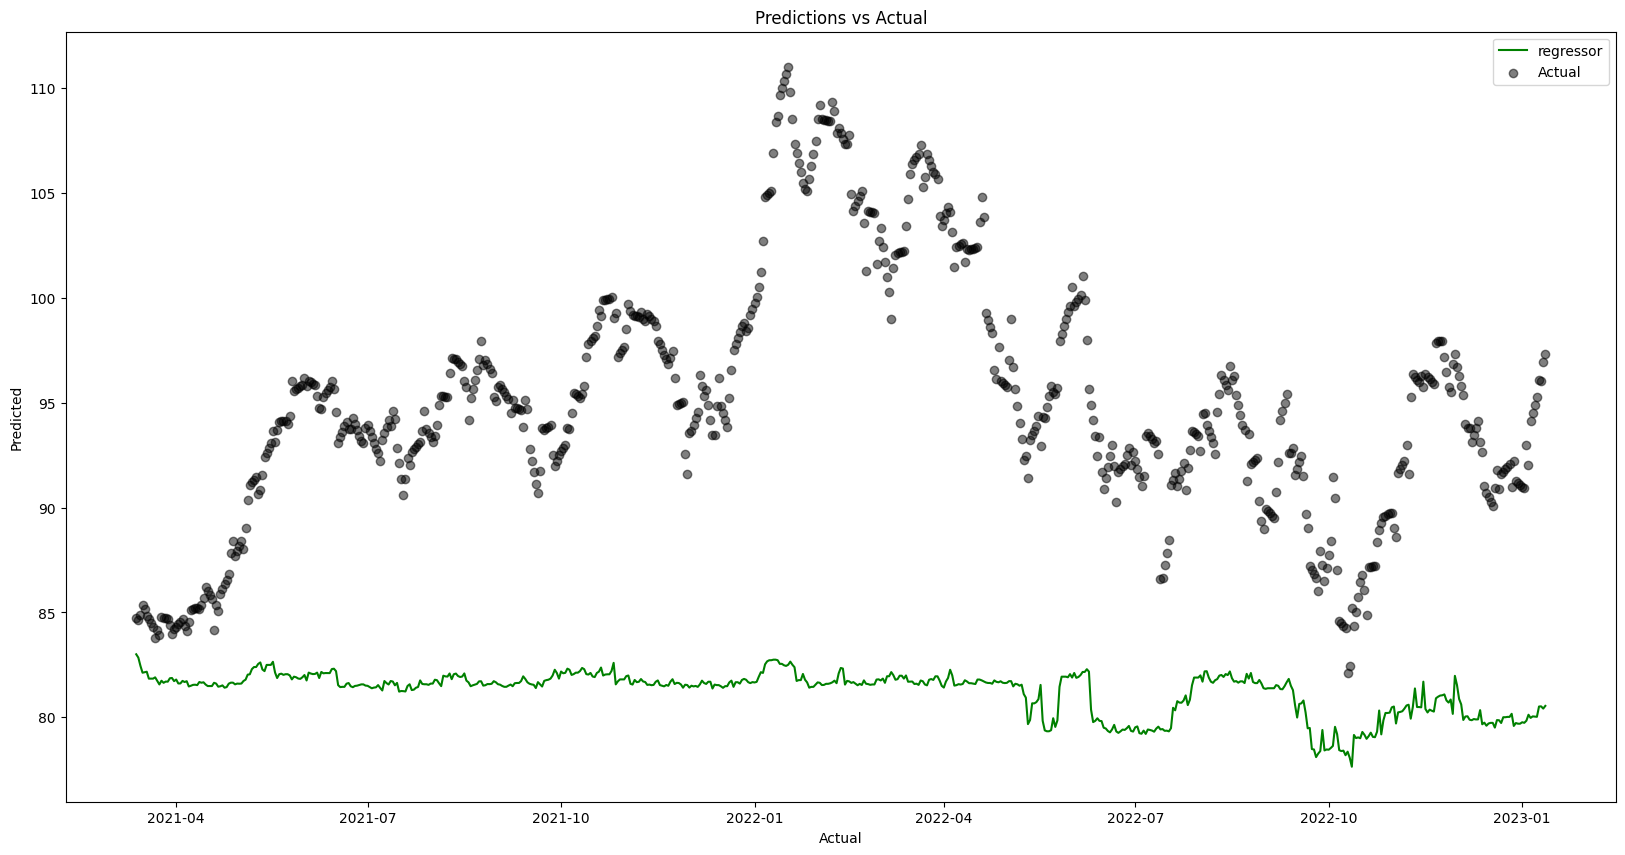

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def plot_prediction(y_test, predictions):
    # Convert predictions to a numpy array
    predictions = np.array(predictions)

    # Check if predictions have an extra dimension and reduce it if necessary
    if predictions.ndim > 1 and predictions.shape[0] == 1:
        predictions = predictions.flatten()

    # Calculate the metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"MSE{mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")

    plt.figure(figsize=(20, 10))
    plt.plot(y_test.index, predictions, color='green', label='regressor')
    plt.scatter(y_test.index, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test
    plt.xlabel("Actual")  # Set the x-axis label
    plt.ylabel("Predicted")  # Set the y-axis label
    plt.legend()  # Show a legend with the labels for each plot
    plt.title("Predictions vs Actual")  # Set the plot title
    plt.show()

plot_prediction(y_test,predictions)

##xgboost

In [ ]:


# necessary imports for XGBoost
from xgboost import XGBRegressor


# setting parameters
xgboost_params = {
    'xgbregressor__n_estimators': (10, 200, 'uniform'),
    'xgbregressor__max_depth': (3, 10, 'uniform'),
    'xgbregressor__learning_rate': (0.01, 0.5, 'uniform'),
    'xgbregressor__gamma': (0, 0.5, 'uniform'),
    'xgbregressor__reg_lambda': (0.1, 1.0, 'uniform'),
    'xgbregressor__reg_alpha': (0.1, 1.0, 'uniform'),
    'xgbregressor__subsample': (0.5, 1.0, 'uniform'),
    'xgbregressor__colsample_bytree': (0.5, 1.0, 'uniform')
}

# create and fit model
xgboost = make_pipeline_fn(XGBRegressor(objective='reg:squarederror'), xgboost_params, n_iter=n_iter)
xgboost.fit(X_train, y_train)

# model report
report(xgboost.cv_results_)
# existing code

# prediction and evaluation
xgboost_predictions = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)

# plotting


KeyboardInterrupt: ignored

Ridge MSE: 1.20, RMSE: 1.09, MAE: 0.87, R2 Score: 0.99, Best params: OrderedDict([('ridge__alpha', 10.0)])


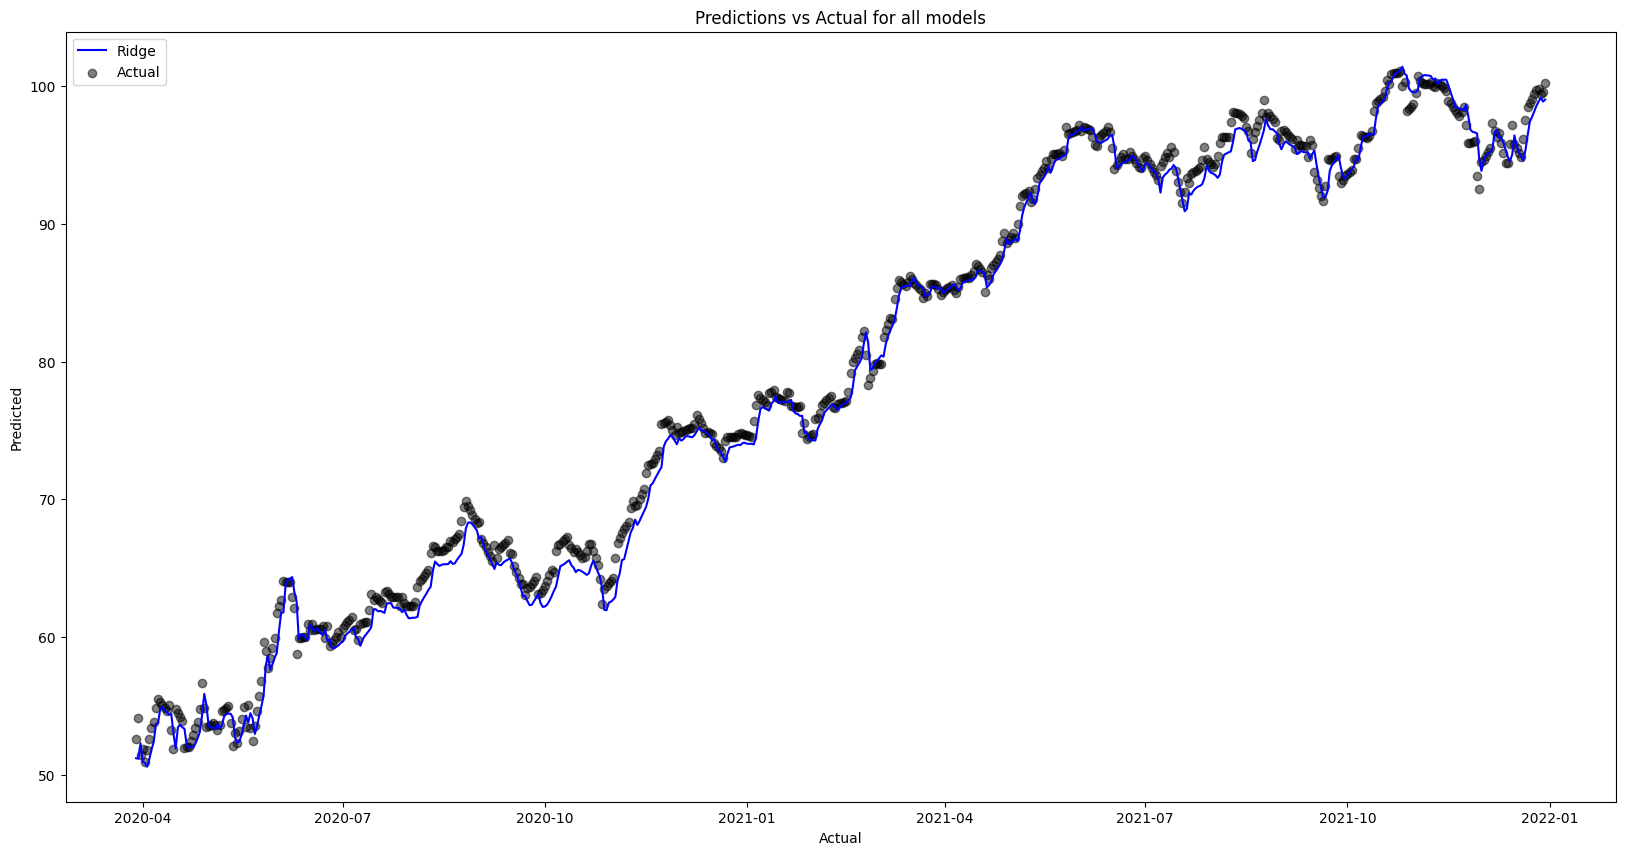

In [ ]:
plot_predictions()

##sgd

In [ ]:
# necessary imports for SGDRegressor
from sklearn.linear_model import SGDRegressor

# setting parameters
sgd_params = {
    'sgdregressor__max_iter': (500, 1000),
    'sgdregressor__tol': (1e-3, 1e-1, 'uniform'),
    'sgdregressor__penalty': ['l2', 'l1', 'elasticnet'],
}

# create and fit model
sgd = make_pipeline_fn(SGDRegressor(), sgd_params, n_iter=n_iter)
sgd.fit(X_train, y_train)

# model report
report(sgd.cv_results_)

# prediction and evaluation
sgd_predictions = sgd.predict(X_test)
sgd_mse = mean_squared_error(y_test, sgd_predictions)
# existing code




Model with rank: 0
Mean validation score: 0.921 (std: 0.058)
Parameters: OrderedDict([('sgdregressor__max_iter', 665), ('sgdregressor__penalty', 'l1'), ('sgdregressor__tol', 0.008571533913539608)])

Model with rank: 1
Mean validation score: 0.911 (std: 0.074)
Parameters: OrderedDict([('sgdregressor__max_iter', 929), ('sgdregressor__penalty', 'l1'), ('sgdregressor__tol', 0.0096594890990808)])

Model with rank: 2
Mean validation score: 0.898 (std: 0.104)
Parameters: OrderedDict([('sgdregressor__max_iter', 781), ('sgdregressor__penalty', 'l1'), ('sgdregressor__tol', 0.042270891589657196)])



##ridge

In [ ]:
# Ridge
ridge_params = {'ridge__alpha': [0.1, 1.0, 10.0]}
ridge = make_pipeline_fn(Ridge(), ridge_params)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
report(ridge.cv_results_)


Model with rank: 0
Mean validation score: 0.849 (std: 0.288)
Parameters: OrderedDict([('ridge__alpha', 10.0)])

Model with rank: 1
Mean validation score: 0.849 (std: 0.288)
Parameters: OrderedDict([('ridge__alpha', 10.0)])

Model with rank: 2
Mean validation score: 0.743 (std: 0.452)
Parameters: OrderedDict([('ridge__alpha', 1.0)])



##lasso


In [ ]:
# Lasso
lasso_params = {'lasso__alpha': [0.1, 1.0, 10.0]}
lasso = make_pipeline_fn(Lasso(), lasso_params)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
report(lasso.cv_results_)



Model with rank: 0
Mean validation score: -2.079 (std: 3.706)
Parameters: OrderedDict([('lasso__alpha', 1.0)])

Model with rank: 1
Mean validation score: -2.079 (std: 3.706)
Parameters: OrderedDict([('lasso__alpha', 1.0)])

Model with rank: 2
Mean validation score: -2.079 (std: 3.706)
Parameters: OrderedDict([('lasso__alpha', 1.0)])

Model with rank: 0
Mean validation score: 0.915 (std: 0.166)
Parameters: OrderedDict([('ridge__alpha', 10.0)])

Model with rank: 1
Mean validation score: 0.915 (std: 0.166)
Parameters: OrderedDict([('ridge__alpha', 10.0)])

Model with rank: 2
Mean validation score: 0.826 (std: 0.382)
Parameters: OrderedDict([('ridge__alpha', 1.0)])



#havent tested those models

In [ ]:
# ElasticNet
elastic_params = {'elasticnet__alpha': [0.1, 1.0, 10.0], 'elasticnet__l1_ratio': [0.1, 0.5, 0.9]}
elastic = make_pipeline_fn(ElasticNet(), elastic_params)
elastic.fit(X_train, y_train)
elastic_predictions = elastic.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_predictions)
report(elastic.cv_results_)



# Principal Component Regression is not directly supported as a single estimator in sklearn,
# but you could create a pipeline that first applies PCA, then a regression model

# Partial Least Squares Regression
pls_params = {'plsregression__n_components': [2, 3, 5]}
pls = make_pipeline_fn(PLSRegression(), pls_params)
pls.fit(X_train, y_train)
pls_predictions = pls.predict(X_test)
pls_mse = mean_squared_error(y_test, pls_predictions)
report(pls.cv_results_)



Model with rank: 0
Mean validation score: 0.707 (std: 0.240)
Parameters: OrderedDict([('elasticnet__alpha', 1.0), ('elasticnet__l1_ratio', 0.5)])

Model with rank: 1
Mean validation score: 0.707 (std: 0.240)
Parameters: OrderedDict([('elasticnet__alpha', 1.0), ('elasticnet__l1_ratio', 0.5)])

Model with rank: 2
Mean validation score: 0.707 (std: 0.240)
Parameters: OrderedDict([('elasticnet__alpha', 1.0), ('elasticnet__l1_ratio', 0.5)])

Model with rank: 0
Mean validation score: 0.921 (std: 0.076)
Parameters: OrderedDict([('plsregression__n_components', 5)])

Model with rank: 1
Mean validation score: 0.921 (std: 0.076)
Parameters: OrderedDict([('plsregression__n_components', 5)])

Model with rank: 2
Mean validation score: 0.868 (std: 0.122)
Parameters: OrderedDict([('plsregression__n_components', 3)])



ValueError: ignored

#plot models

SGDRegressor MSE: 8.17, RMSE: 2.86, MAE: 2.41, R2 Score: 0.81
Ridge MSE: 1.69, RMSE: 1.30, MAE: 1.01, R2 Score: 0.96, Best params: OrderedDict([('ridge__alpha', 10.0)])
Ridge MSE: 1.69, RMSE: 1.30, MAE: 1.01, R2 Score: 0.96, Best params: OrderedDict([('ridge__alpha', 10.0)])
ElasticNet MSE: 23.77, RMSE: 4.88, MAE: 4.30, R2 Score: 0.45, Best params: OrderedDict([('elasticnet__alpha', 1.0), ('elasticnet__l1_ratio', 0.5)])
PLSRegression MSE: 10.24, RMSE: 3.20, MAE: 2.75, R2 Score: 0.76, Best params: OrderedDict([('plsregression__n_components', 5)])


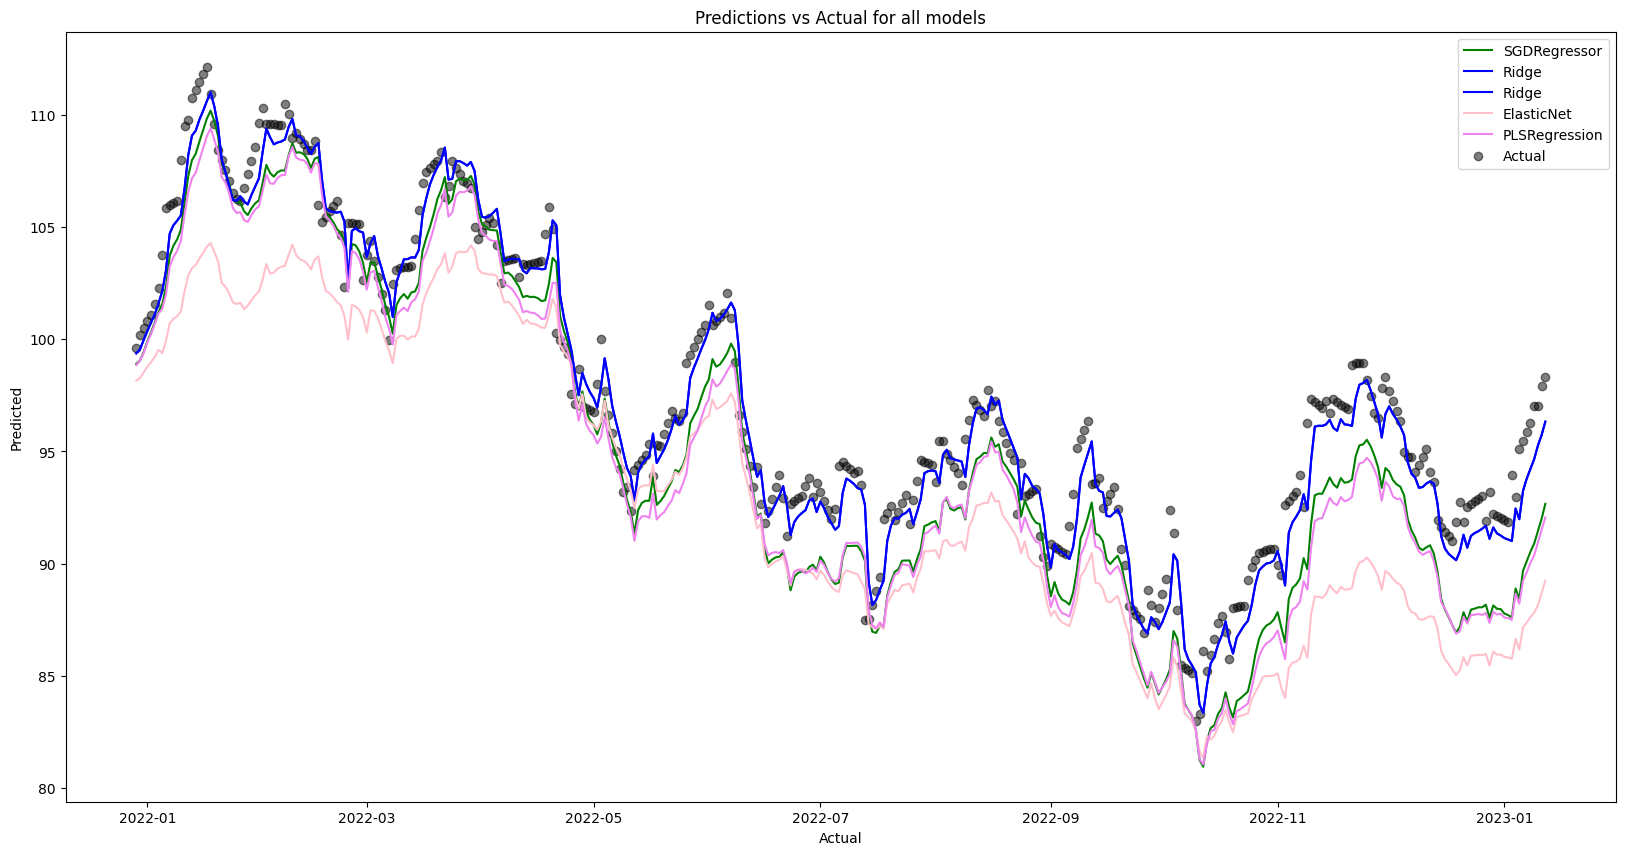

In [ ]:
plot_predictions()

Ridge MSE: 1.69, RMSE: 1.30, MAE: 1.01, R2 Score: 0.96, Best params: OrderedDict([('ridge__alpha', 10.0)])
SGDRegressor MSE: 8.17, RMSE: 2.86, MAE: 2.41, R2 Score: 0.81


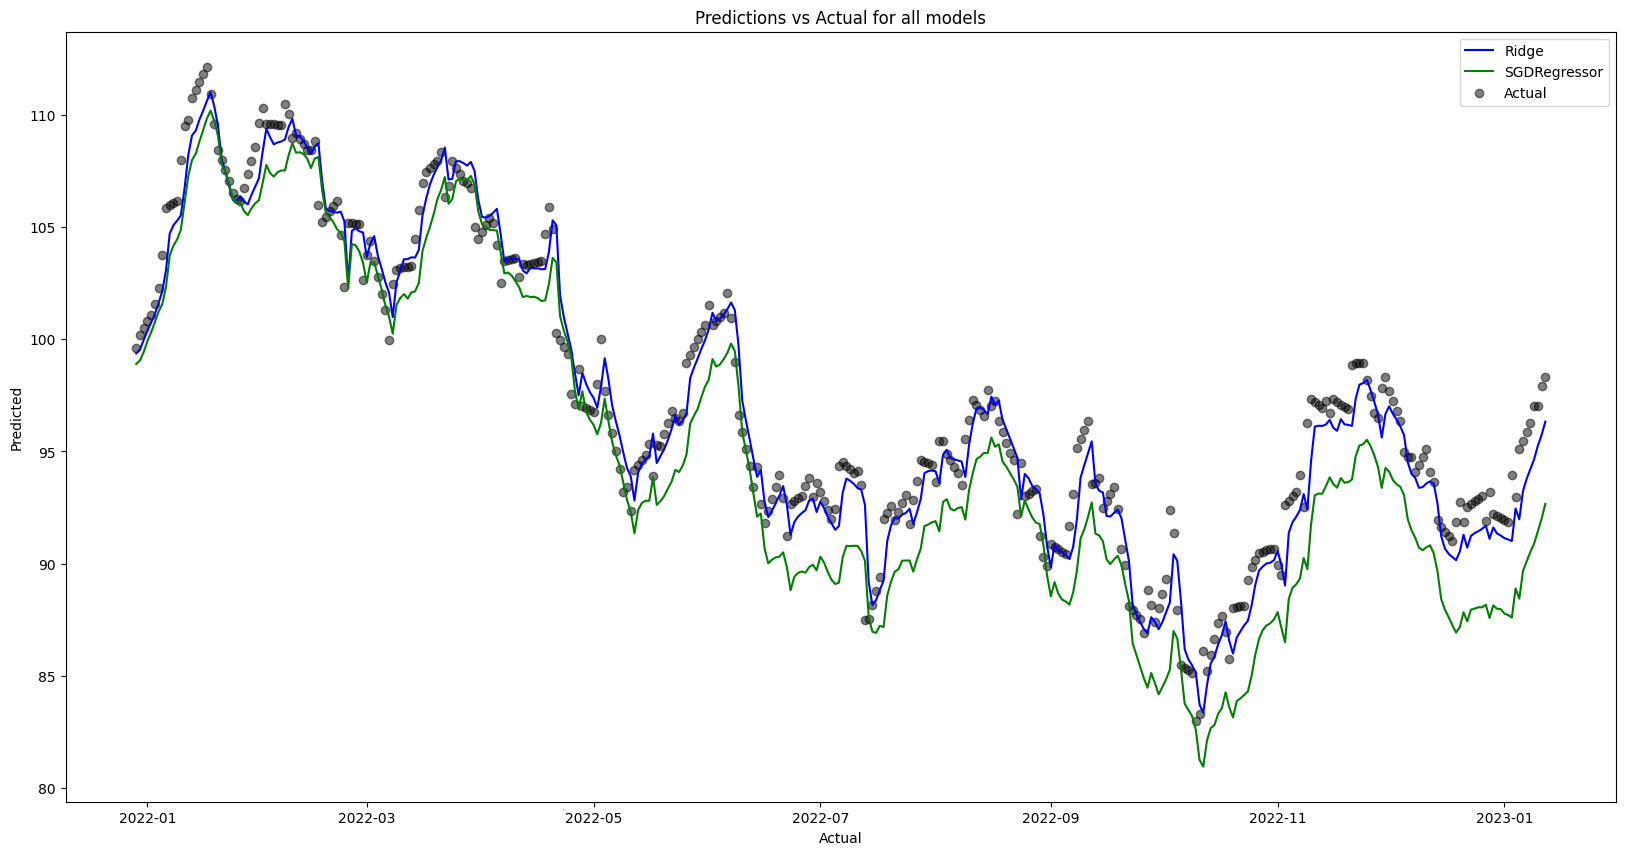

In [ ]:
# Print out the results
#should be better version for plotting
plt.figure(figsize=(20, 10))

# RandomForestRegressor Results
if 'rf_predictions' in locals():
    print(f"RandomForestRegressor MSE: {rf_mse:.2f}, RMSE: {np.sqrt(rf_mse):.2f}, MAE: {mean_absolute_error(y_test, rf_predictions):.2f}, R2 Score: {r2_score(y_test, rf_predictions):.2f}, Best params: {rf.best_params_}")
    plt.plot(y_test.index, rf_predictions, color='green', label='RandomForestRegressor')


# Ridge Results

if 'ridge_predictions' in locals():
    print(f"Ridge MSE: {ridge_mse:.2f}, RMSE: {np.sqrt(ridge_mse):.2f}, MAE: {mean_absolute_error(y_test, ridge_predictions):.2f}, R2 Score: {r2_score(y_test, ridge_predictions):.2f}, Best params: {ridge.best_params_}")
    plt.plot(y_test.index, ridge_predictions, color='blue', label='Ridge')

# GradientBoostingRegressor Results
if 'gbr_predictions' in locals():
    print(f"GradientBoostingRegressor MSE: {gbr_mse:.2f}, RMSE: {np.sqrt(gbr_mse):.2f}, MAE: {mean_absolute_error(y_test, gbr_predictions):.2f}, R2 Score: {r2_score(y_test, gbr_predictions):.2f}, Best params: {gbr.best_params_}")
    plt.plot(y_test.index, gbr_predictions, color='orange', label='GradientBoostingRegressor')

# AdaBoostRegressor Results
if 'ada_predictions' in locals():
    print(f"AdaBoostRegressor MSE: {ada_mse:.2f}, RMSE: {np.sqrt(ada_mse):.2f}, MAE: {mean_absolute_error(y_test, ada_predictions):.2f}, R2 Score: {r2_score(y_test, ada_predictions):.2f}, Best params: {ada.best_params_}")
    plt.plot(y_test.index, ada_predictions, color='purple', label='AdaBoostRegressor')

# XGBoost Results
if 'xgboost_predictions' in locals():
    print(f"XGBoost MSE: {xgboost_mse:.2f}, RMSE: {np.sqrt(xgboost_mse):.2f}, MAE: {mean_absolute_error(y_test, xgboost_predictions):.2f}, R2 Score: {r2_score(y_test, xgboost_predictions):.2f}, Best params: {xgboost.best_params_}")
    plt.plot(y_test.index, xgboost_predictions, color='cyan', label='XGBoost')

# StackingRegressor Results
if 'stacking_predictions' in locals():
    print(f"StackingRegressor MSE: {stacking_mse:.2f}, RMSE: {np.sqrt(stacking_mse):.2f}, MAE: {mean_absolute_error(y_test, stacking_predictions):.2f}, R2 Score: {r2_score(y_test, stacking_predictions):.2f}")
    plt.plot(y_test.index, stacking_predictions, color='brown', label='StackingRegressor')
    # SGDRegressor Results
if 'sgd_predictions' in locals():
    print(f"SGDRegressor MSE: {sgd_mse:.2f}, RMSE: {np.sqrt(sgd_mse):.2f}, MAE: {mean_absolute_error(y_test, sgd_predictions):.2f}, R2 Score: {r2_score(y_test, sgd_predictions):.2f}")
    plt.plot(y_test.index, sgd_predictions, color='green', label='SGDRegressor')


plt.scatter(y_test.index, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test

plt.xlabel("Actual")  # Set the x-axis label
plt.ylabel("Predicted")  # Set the y-axis label
plt.legend()  # Show a legend with the labels for each plot
plt.title("Predictions vs Actual for all models")  # Set the plot title
plt.show()  # Display the plot


Ridge MSE: 1.20, RMSE: 1.09, MAE: 0.87, R2 Score: 0.99, Best params: OrderedDict([('ridge__alpha', 10.0)])
SGDRegressor MSE: 2.51, RMSE: 1.58, MAE: 1.27, R2 Score: 0.99


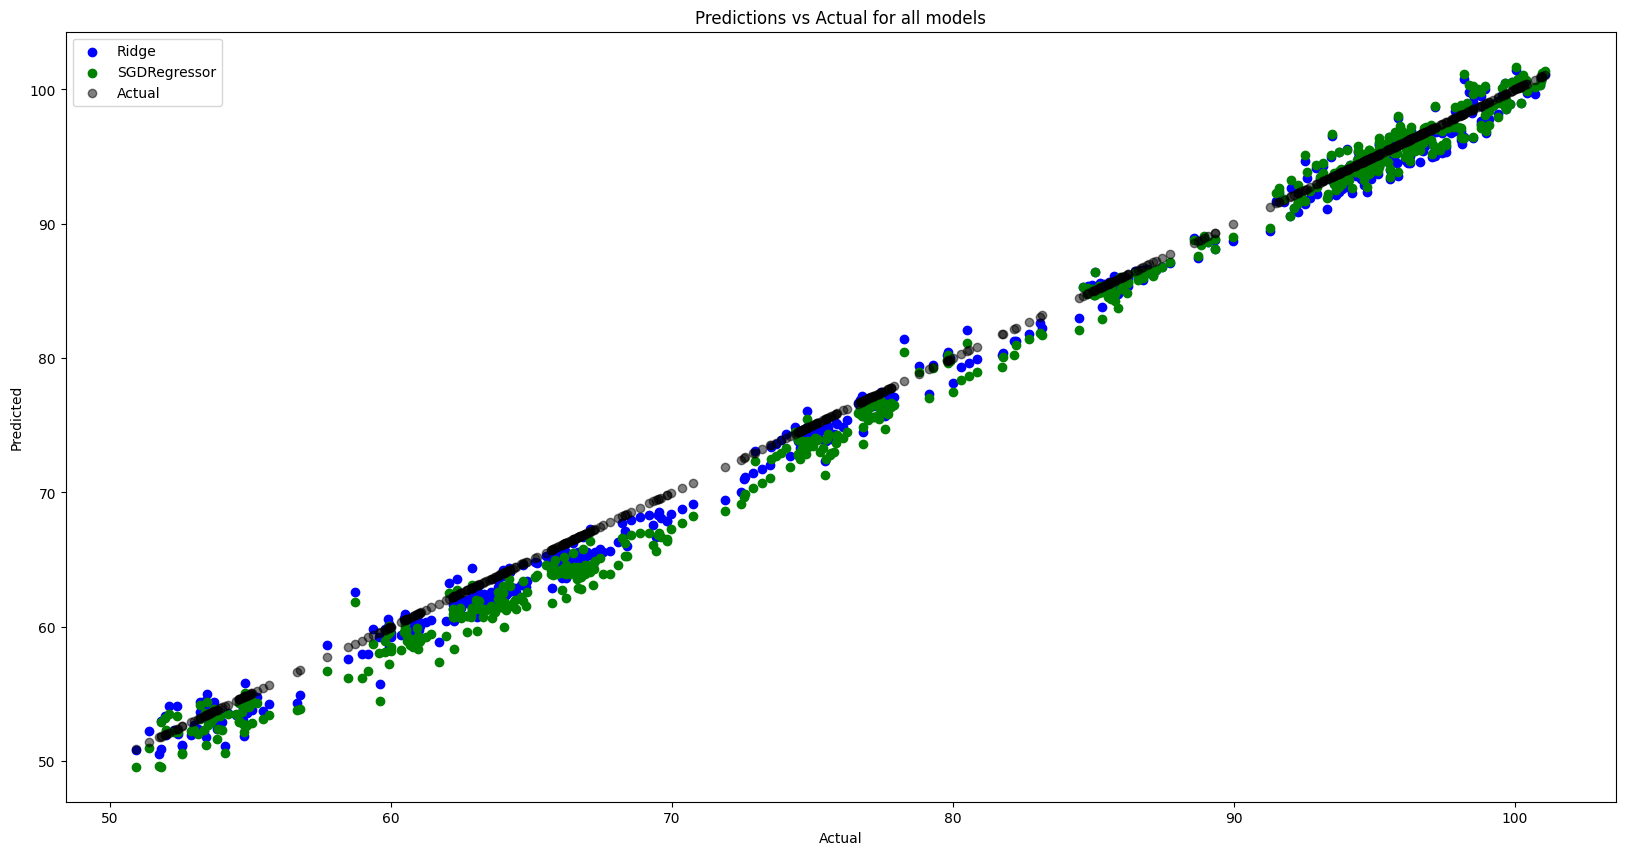

In [ ]:
# Print out the results
#should be better version for plotting
plt.figure(figsize=(20, 10))

# RandomForestRegressor Results
if 'rf_predictions' in locals():
    print(f"RandomForestRegressor MSE: {rf_mse:.2f}, RMSE: {np.sqrt(rf_mse):.2f}, MAE: {mean_absolute_error(y_test, rf_predictions):.2f}, R2 Score: {r2_score(y_test, rf_predictions):.2f}, Best params: {rf.best_params_}")
    plt.scatter(y_test, rf_predictions, color='green', label='RandomForestRegressor')

# Lasso Results
if 'lasso_predictions' in locals():
    print(f"Lasso MSE: {lasso_mse:.2f}, RMSE: {np.sqrt(lasso_mse):.2f}, MAE: {mean_absolute_error(y_test, lasso_predictions):.2f}, R2 Score: {r2_score(y_test, lasso_predictions):.2f}, Best params: {lasso.best_params_}")
    plt.scatter(y_test, lasso_predictions, color='red', label='Lasso')

# Ridge Results
if 'ridge_predictions' in locals():
    print(f"Ridge MSE: {ridge_mse:.2f}, RMSE: {np.sqrt(ridge_mse):.2f}, MAE: {mean_absolute_error(y_test, ridge_predictions):.2f}, R2 Score: {r2_score(y_test, ridge_predictions):.2f}, Best params: {ridge.best_params_}")
    plt.scatter(y_test, ridge_predictions, color='blue', label='Ridge')

# GradientBoostingRegressor Results
if 'gbr_predictions' in locals():
    print(f"GradientBoostingRegressor MSE: {gbr_mse:.2f}, RMSE: {np.sqrt(gbr_mse):.2f}, MAE: {mean_absolute_error(y_test, gbr_predictions):.2f}, R2 Score: {r2_score(y_test, gbr_predictions):.2f}, Best params: {gbr.best_params_}")
    plt.scatter(y_test, gbr_predictions, color='orange', label='GradientBoostingRegressor')

# AdaBoostRegressor Results
if 'ada_predictions' in locals():
    print(f"AdaBoostRegressor MSE: {ada_mse:.2f}, RMSE: {np.sqrt(ada_mse):.2f}, MAE: {mean_absolute_error(y_test, ada_predictions):.2f}, R2 Score: {r2_score(y_test, ada_predictions):.2f}, Best params: {ada.best_params_}")
    plt.scatter(y_test, ada_predictions, color='purple', label='AdaBoostRegressor')

# XGBoost Results
if 'xgboost_predictions' in locals():
    print(f"XGBoost MSE: {xgboost_mse:.2f}, RMSE: {np.sqrt(xgboost_mse):.2f}, MAE: {mean_absolute_error(y_test, xgboost_predictions):.2f}, R2 Score: {r2_score(y_test, xgboost_predictions):.2f}, Best params: {xgboost.best_params_}")
    plt.scatter(y_test, xgboost_predictions, color='cyan', label='XGBoost')

# StackingRegressor Results
if 'stacking_predictions' in locals():
    print(f"StackingRegressor MSE: {stacking_mse:.2f}, RMSE: {np.sqrt(stacking_mse):.2f}, MAE: {mean_absolute_error(y_test, stacking_predictions):.2f}, R2 Score: {r2_score(y_test, stacking_predictions):.2f}")
    plt.scatter(y_test, stacking_predictions, color='brown', label='StackingRegressor')
    # SGDRegressor Results
if 'sgd_predictions' in locals():
    print(f"SGDRegressor MSE: {sgd_mse:.2f}, RMSE: {np.sqrt(sgd_mse):.2f}, MAE: {mean_absolute_error(y_test, sgd_predictions):.2f}, R2 Score: {r2_score(y_test, sgd_predictions):.2f}")
    plt.scatter(y_test, sgd_predictions, color='green', label='SGDRegressor')


plt.scatter(y_test, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test

plt.xlabel("Actual")  # Set the x-axis label
plt.ylabel("Predicted")  # Set the y-axis label
plt.legend()  # Show a legend with the labels for each plot
plt.title("Predictions vs Actual for all models")  # Set the plot title
plt.show()  # Display the plot


#imma try some big analysis

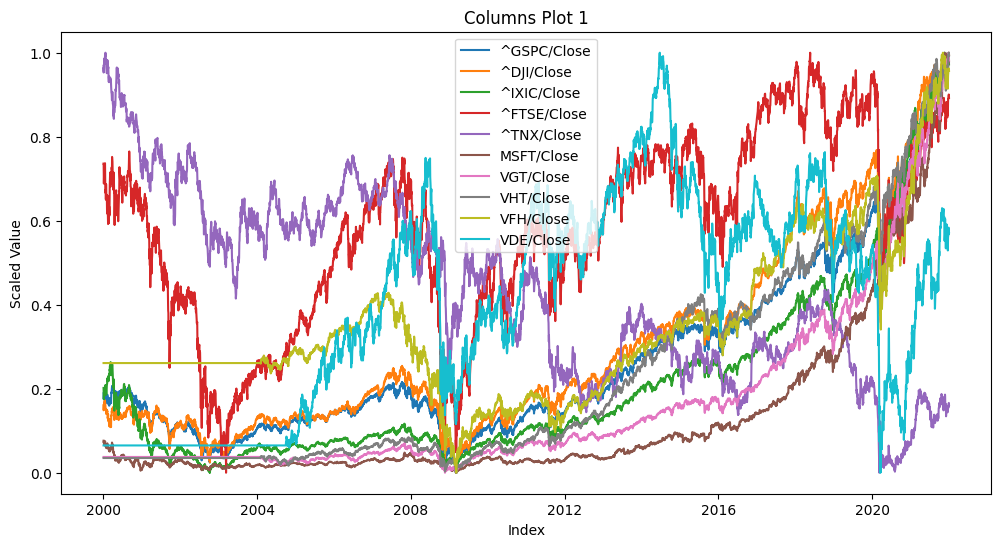

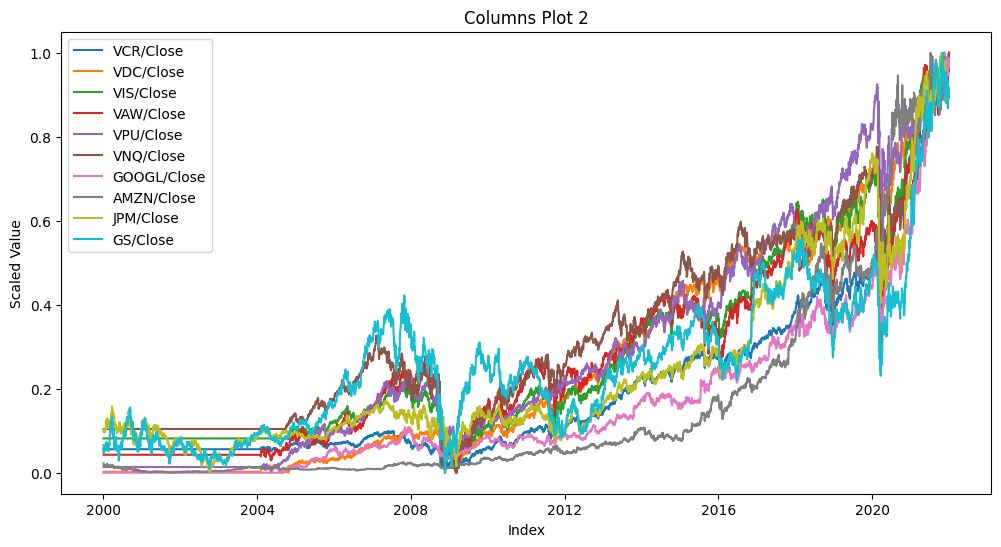

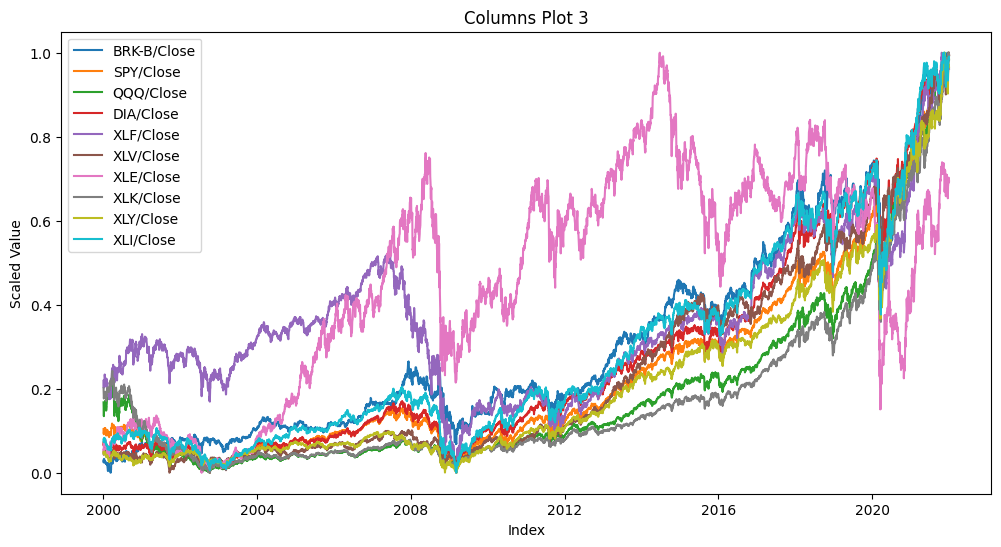

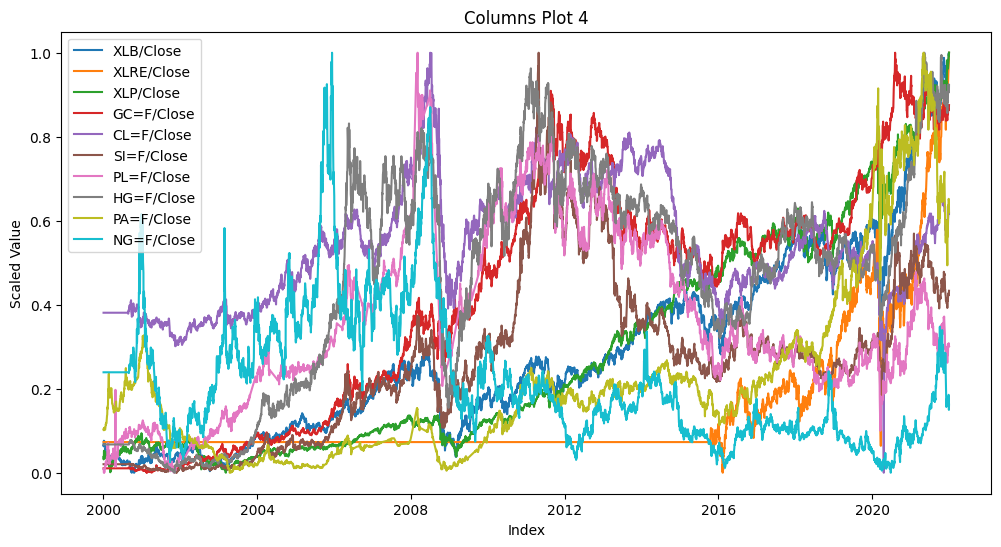

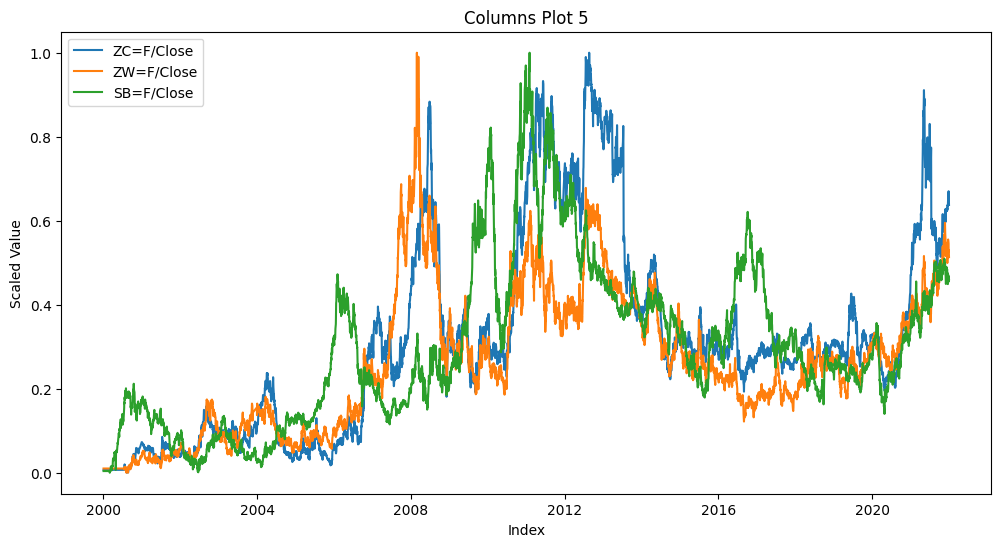

In [ ]:
plot_columns(df_yahoo[close])

# DIFFERENT RESULTS


Lasso MSE: 51.69, RMSE: 7.19, MAE: 6.70, R2 Score: 0.92, Best params: OrderedDict([('lasso__alpha', 1.0)])
Ridge MSE: 4.69, RMSE: 2.17, MAE: 1.60, R2 Score: 0.99, Best params: OrderedDict([('ridge__alpha', 10.0)])


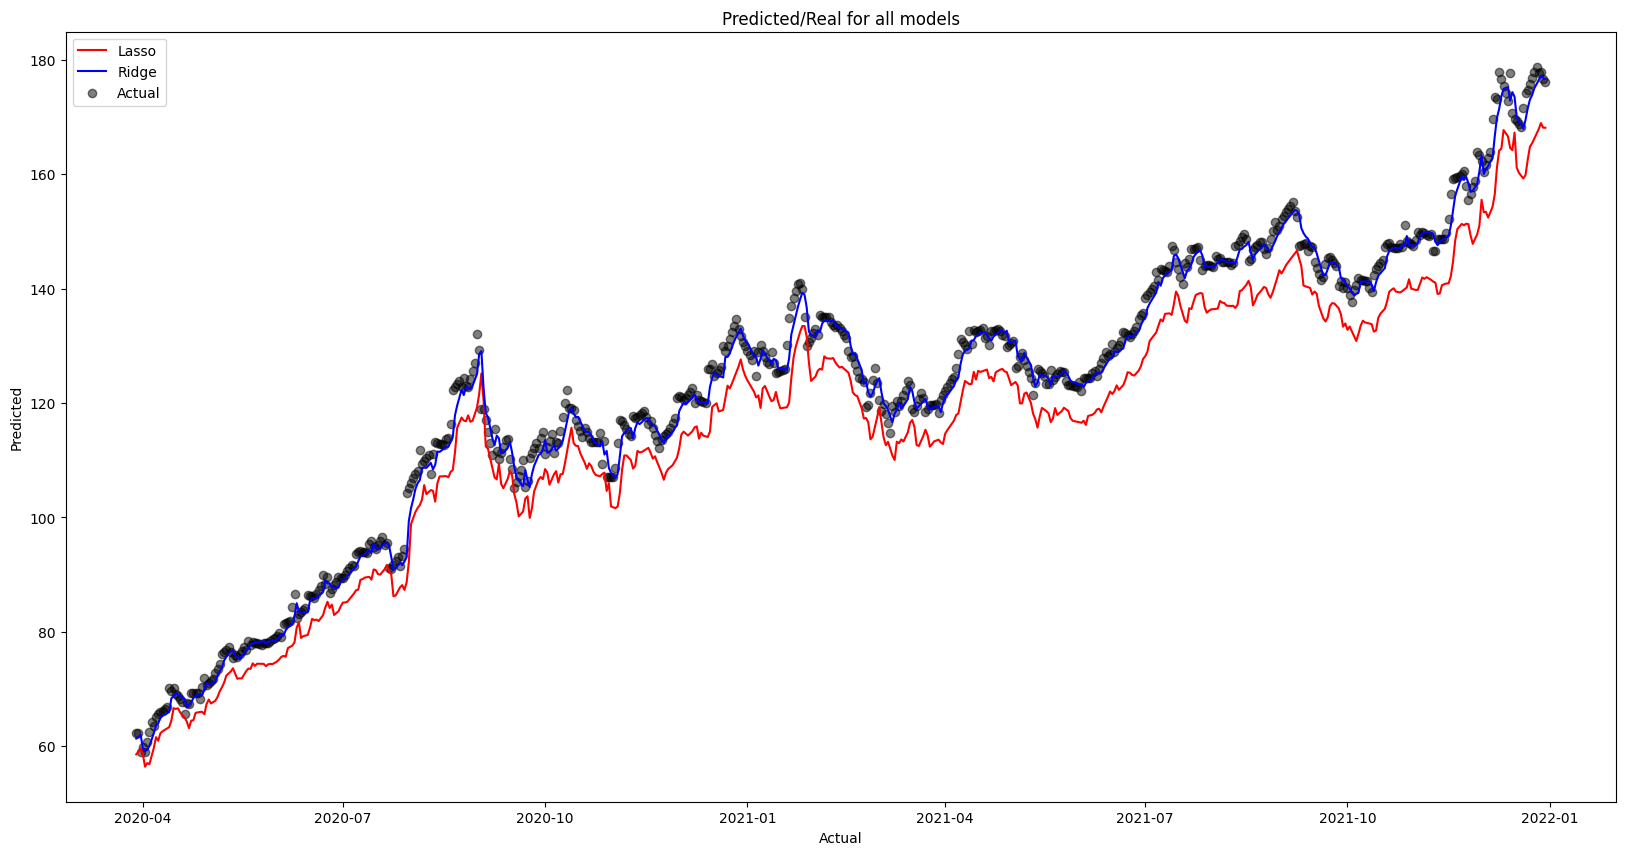

In [ ]:
# Print out the results
#should be better version for plotting
plt.figure(figsize=(20, 10))

# RandomForestRegressor Results
if 'rf_predictions' in locals():
    print(f"RandomForestRegressor MSE: {rf_mse:.2f}, RMSE: {np.sqrt(rf_mse):.2f}, MAE: {mean_absolute_error(y_test, rf_predictions):.2f}, R2 Score: {r2_score(y_test, rf_predictions):.2f}, Best params: {rf.best_params_}")
    plt.plot(y_test.index, rf_predictions, color='green', label='RandomForestRegressor')

# Lasso Results
if 'lasso_predictions' in locals():
    print(f"Lasso MSE: {lasso_mse:.2f}, RMSE: {np.sqrt(lasso_mse):.2f}, MAE: {mean_absolute_error(y_test, lasso_predictions):.2f}, R2 Score: {r2_score(y_test, lasso_predictions):.2f}, Best params: {lasso.best_params_}")
    plt.plot(y_test.index, lasso_predictions, color='red', label='Lasso')

# Ridge Results
if 'ridge_predictions' in locals():
    print(f"Ridge MSE: {ridge_mse:.2f}, RMSE: {np.sqrt(ridge_mse):.2f}, MAE: {mean_absolute_error(y_test, ridge_predictions):.2f}, R2 Score: {r2_score(y_test, ridge_predictions):.2f}, Best params: {ridge.best_params_}")
    plt.plot(y_test.index, ridge_predictions, color='blue', label='Ridge')

# GradientBoostingRegressor Results
if 'gbr_predictions' in locals():
    print(f"GradientBoostingRegressor MSE: {gbr_mse:.2f}, RMSE: {np.sqrt(gbr_mse):.2f}, MAE: {mean_absolute_error(y_test, gbr_predictions):.2f}, R2 Score: {r2_score(y_test, gbr_predictions):.2f}, Best params: {gbr.best_params_}")
    plt.plot(y_test.index, gbr_predictions, color='orange', label='GradientBoostingRegressor')

# AdaBoostRegressor Results
if 'ada_predictions' in locals():
    print(f"AdaBoostRegressor MSE: {ada_mse:.2f}, RMSE: {np.sqrt(ada_mse):.2f}, MAE: {mean_absolute_error(y_test, ada_predictions):.2f}, R2 Score: {r2_score(y_test, ada_predictions):.2f}, Best params: {ada.best_params_}")
    plt.plot(y_test.index, ada_predictions, color='purple', label='AdaBoostRegressor')

# XGBoost Results
if 'xgboost_predictions' in locals():
    print(f"XGBoost MSE: {xgboost_mse:.2f}, RMSE: {np.sqrt(xgboost_mse):.2f}, MAE: {mean_absolute_error(y_test, xgboost_predictions):.2f}, R2 Score: {r2_score(y_test, xgboost_predictions):.2f}, Best params: {xgboost.best_params_}")
    plt.plot(y_test.index, xgboost_predictions, color='cyan', label='XGBoost')

# StackingRegressor Results
if 'stacking_predictions' in locals():
    print(f"StackingRegressor MSE: {stacking_mse:.2f}, RMSE: {np.sqrt(stacking_mse):.2f}, MAE: {mean_absolute_error(y_test, stacking_predictions):.2f}, R2 Score: {r2_score(y_test, stacking_predictions):.2f}")
    plt.plot(y_test.index, stacking_predictions, color='brown', label='StackingRegressor')

plt.scatter(y_test.index, y_test, color='black', label='Actual', alpha=0.5)  # Scatter plot for y_test

plt.xlabel("Actual")  # Set the x-axis label
plt.ylabel("Predicted")  # Set the y-axis label
plt.legend()  # Show a legend with the labels for each plot
plt.title("Predicted/Real for all models")  # Set the plot title
plt.show()  # Display the plot


Lasso MSE: 12.56, RMSE: 3.54, MAE: 3.31, R2 Score: 0.91, Best params: OrderedDict([('lasso__alpha', 1.0)])
Ridge MSE: 1.60, RMSE: 1.26, MAE: 0.94, R2 Score: 0.99, Best params: OrderedDict([('ridge__alpha', 10.0)])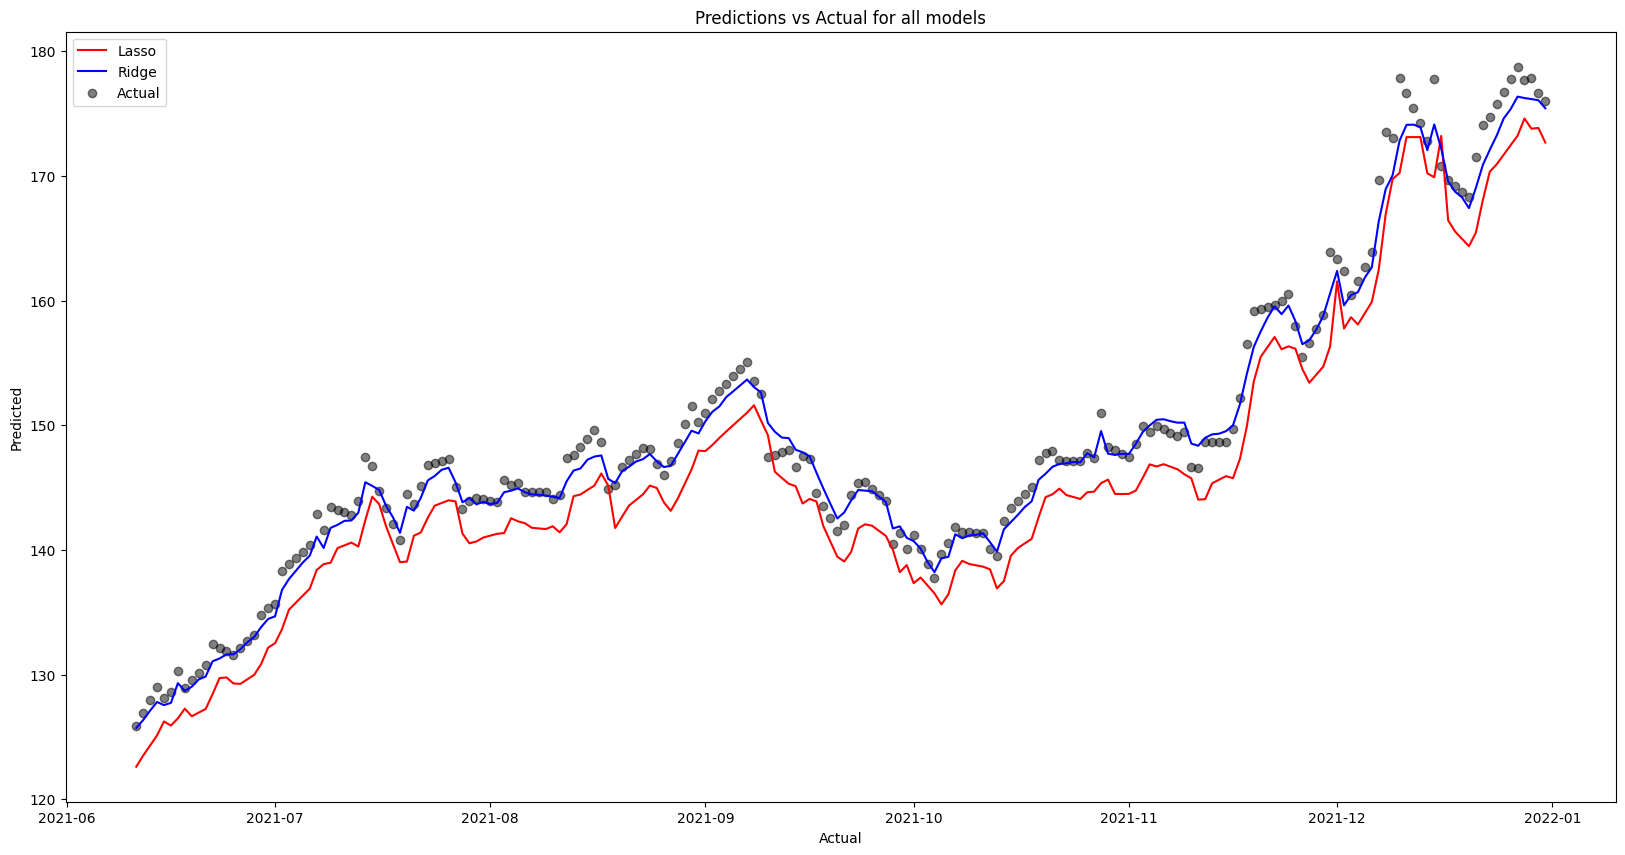

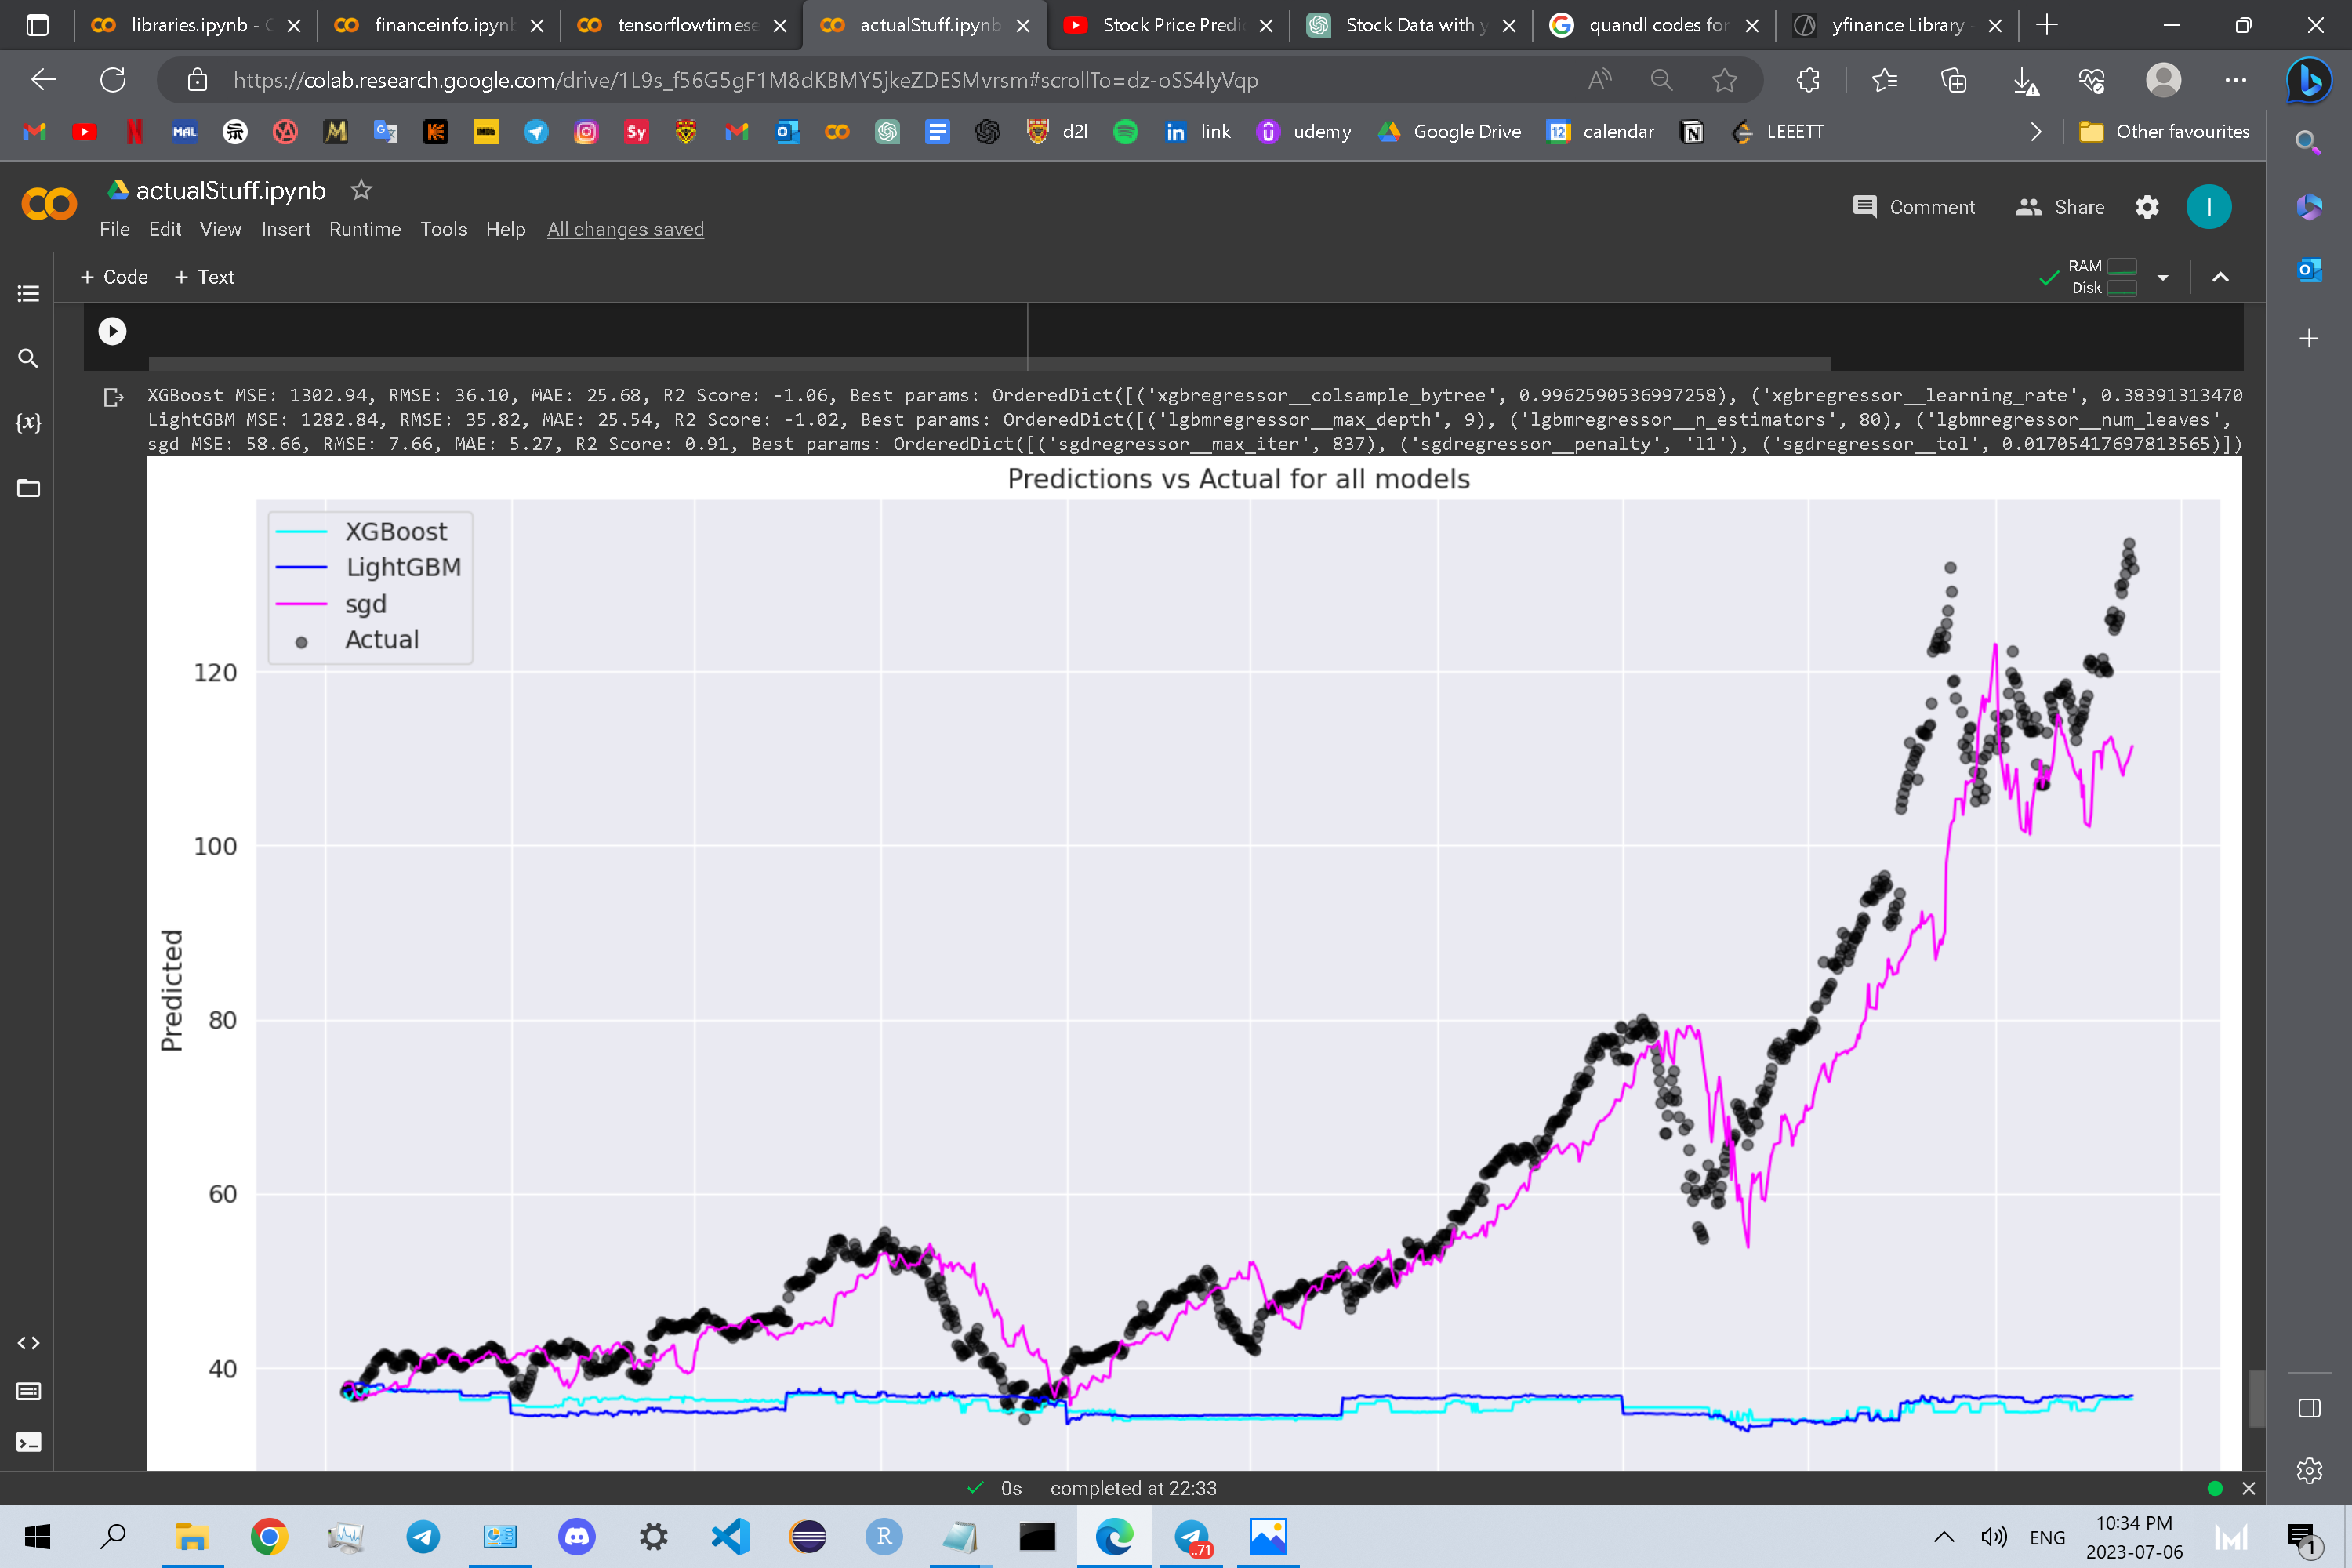

Lasso MSE: 15.64, RMSE: 3.95, MAE: 3.53, R2 Score: 0.89, Best params: OrderedDict([('lasso__alpha', 1.0)])
Ridge MSE: 5.84, RMSE: 2.42, MAE: 1.83, R2 Score: 0.96, Best params: OrderedDict([('ridge__alpha', 10.0)])
SGDRegressor MSE: 22.79, RMSE: 4.77, MAE: 3.81, R2 Score: 0.84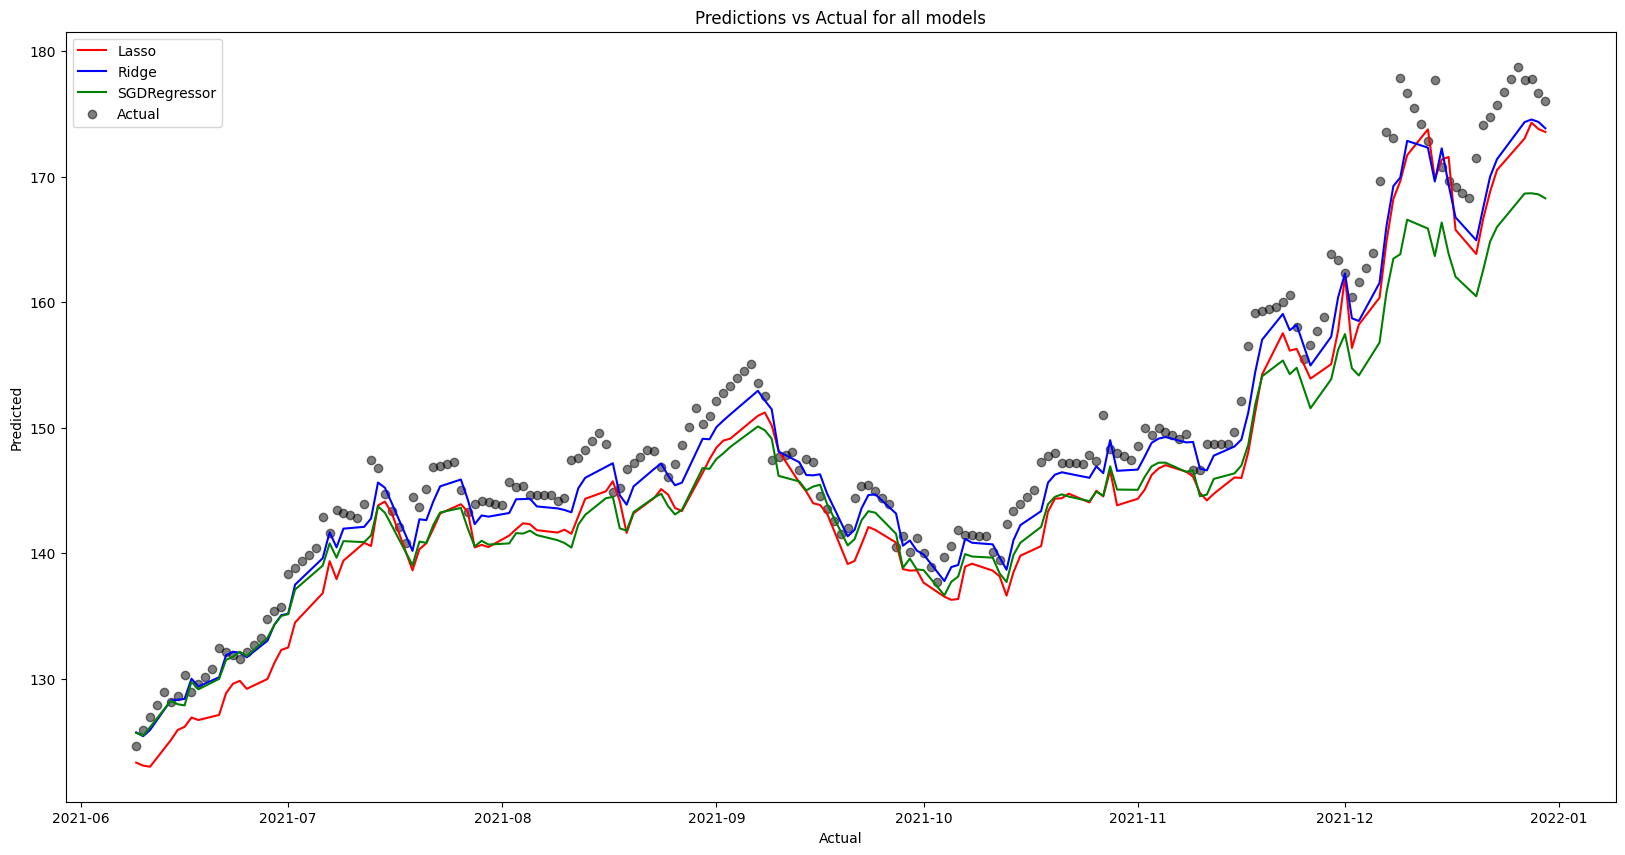

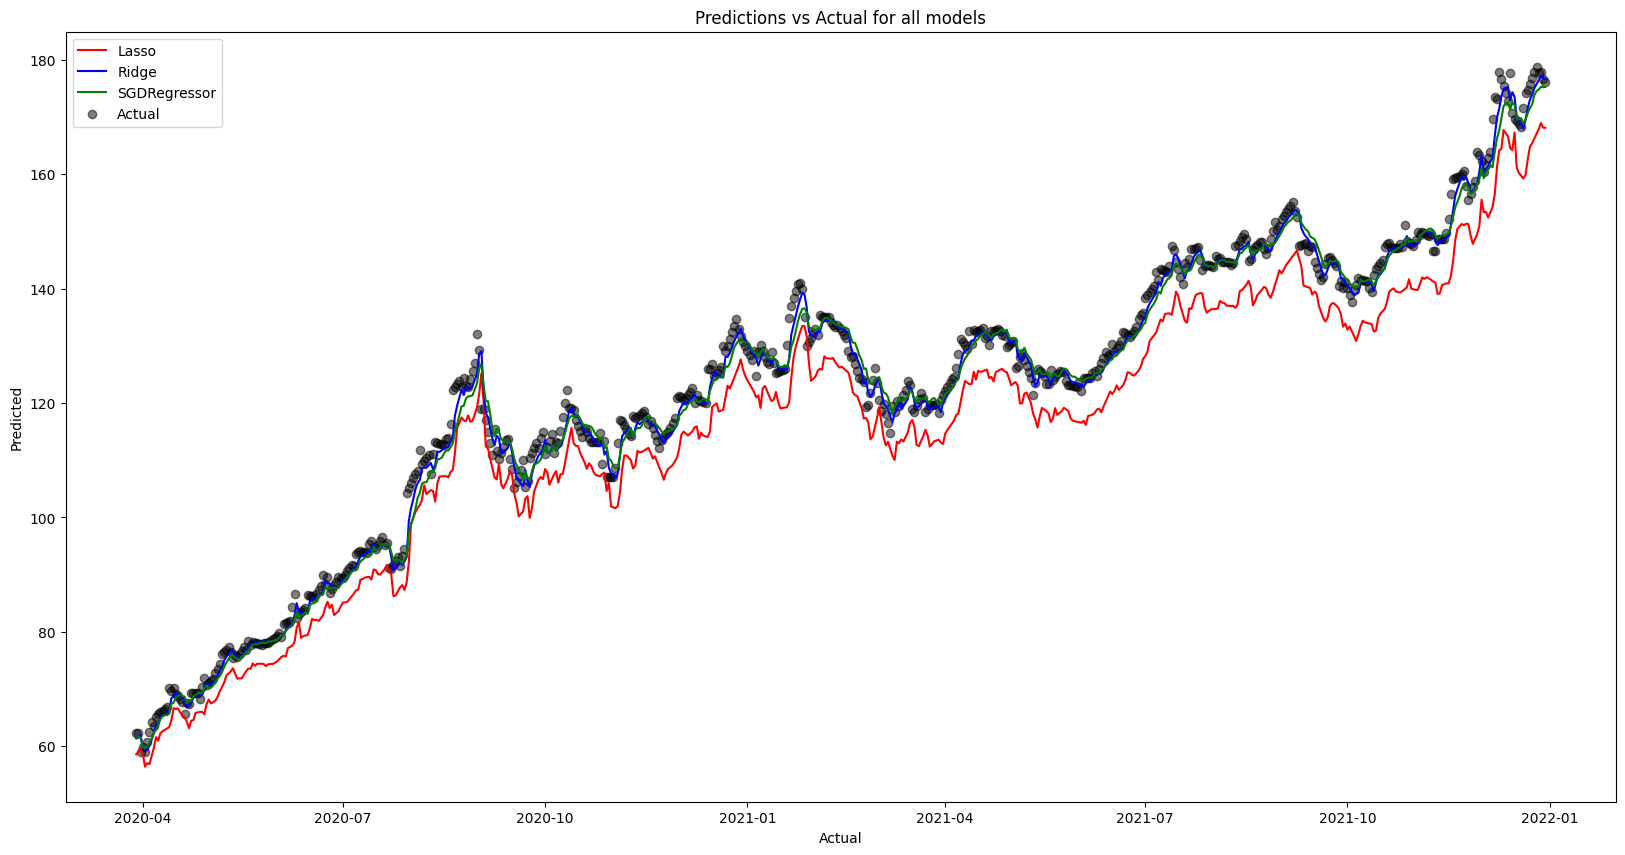